In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline

In [ ]:
# Question 1 begins here

In [221]:
df=pd.read_csv('Fever.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          36 non-null     int64  
 1   B          36 non-null     int64  
 2   Volunteer  36 non-null     int64  
 3   Relief     36 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


In [222]:
# Preliminary analysis
df.describe()


A          B  Volunteer     Relief
count  36.000000  36.000000  36.000000  36.000000
mean    2.000000   2.000000   2.500000   7.183333
std     0.828079   0.828079   1.133893   3.272090
min     1.000000   1.000000   1.000000   2.300000
25%     1.000000   1.000000   1.750000   4.675000
50%     2.000000   2.000000   2.500000   6.000000
75%     3.000000   3.000000   3.250000   9.325000
max     3.000000   3.000000   4.000000  13.500000

In [223]:
# Preliminary analysis
df.head(5)

A  B  Volunteer  Relief
0  1  1          1     2.4
1  1  1          2     2.7
2  1  1          3     2.3
3  1  1          4     2.5
4  1  2          1     4.6

In [224]:
# Preliminary analysis
# Checking for any missing values.
# No missing values noticed
df.isnull().sum()

A            0
B            0
Volunteer    0
Relief       0
dtype: int64

In [225]:
# Preliminary analysis
df[['A','B']].nunique()
# The results suggests that there are 3 levels across each factors i.e A and B ingredients.

A    3
B    3
dtype: int64

In [226]:
# Preliminary analysis
print('Value counts for A\n',df['A'].value_counts())
print('\n\nValue counts for B\n',df['B'].value_counts())

# The results suggests that among 36 treatments there are 12 observations for each of the 3 levels across both factors.

Value counts for A
 3    12
2    12
1    12
Name: A, dtype: int64


Value counts for B
 3    12
2    12
1    12
Name: B, dtype: int64


In [227]:
# Preliminary analysis
# Following crosstab gives preview of arithmetic mean of relief at the following levels
# 1. Ingredient level (i.e marginal totals->'All') corresponding to the ingredients horizontally (for A) and vertically (for B)
# 2. Treatment level in each cell at the cross section of A and B ingredients 
# 3. Grand margin at the intersection of marginal total 'All'for both the ingredients
# 4. The result also suggests that there are 9 treatment blocks with each block combining both factors at one of their 
# treatment levels. i.e 4 volunteer for each treatment * 9 different treatments = 36 treatments/observations

print(df[['A','B','Volunteer']].groupby(by=['A','B']).count())

print('\n\nCross tab between Ingredient A and B depicting treatment level arithmetic means along with marginal totals as below')
print('-------------------------------------------------------------------------------------------------------------------')
pd.crosstab(df['A'],df['B'],values=df['Relief'],aggfunc='mean',margins=True)

     Volunteer
A B           
1 1          4
  2          4
  3          4
2 1          4
  2          4
  3          4
3 1          4
  2          4
  3          4


Cross tab between Ingredient A and B depicting treatment level arithmetic means along with marginal totals as below
-------------------------------------------------------------------------------------------------------------------


B           1          2          3       All
A                                            
1    2.475000   4.600000   4.575000  3.883333
2    5.450000   8.925000   9.125000  7.833333
3    5.975000  10.275000  13.250000  9.833333
All  4.633333   7.933333   8.983333  7.183333

<AxesSubplot:xlabel='A', ylabel='Relief'>

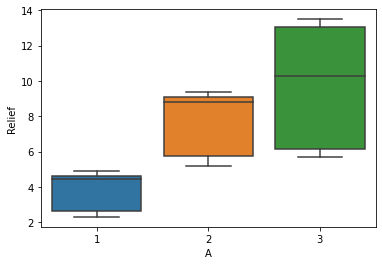

In [228]:
# Preliminary analysis
sns.boxplot(x="A", y="Relief", data=df)

<AxesSubplot:xlabel='B', ylabel='Relief'>

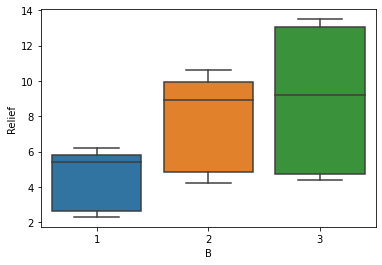

In [229]:
# Preliminary analysis
sns.boxplot(x="B", y="Relief", data=df)

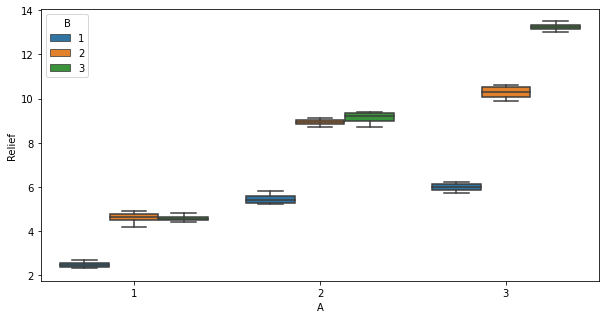

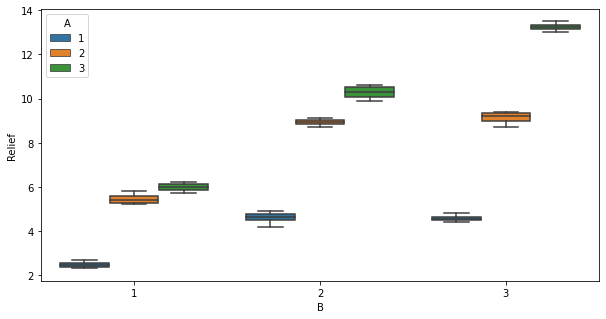

In [230]:
# Preliminary analysis
plt.figure(figsize=(10,5))
sns.boxplot(x="A", y="Relief", data=df,hue='B')
plt.show()
plt.figure(figsize=(10,5))
sns.boxplot(x="B", y="Relief", data=df,hue='A')
plt.show()

<AxesSubplot:xlabel='A'>

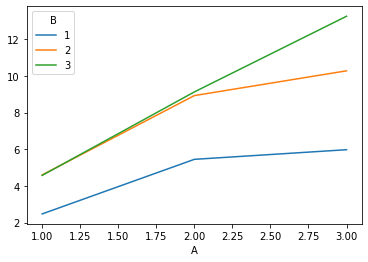

In [231]:
# Preliminary analysis
# The below plot of means across each combination of ingredient A and B across each ofthe 3 levels shows a clear distinguished
# pattern when it comes to level 3 which deviates from the trend of remaining two levels such as 1 and 2. i.e Relief seems to 
# be showing increased mean for the treatment with ingredient level 3 for both A and B. We shall test this aspect through
# interaction effect using two way ANOVA
pd.crosstab(df['A'],df['B'],values=df['Relief'],aggfunc='mean',margins=False).plot()

In [ ]:
#1.1 Part A
# Hypothesis for one way Anova on A ingredient is as below
# 𝐻0  : The means of 'Relief' variable with respect to each of the treatment levels for A ingredient is equal.

# 𝐻1  : At least one of the means of 'Relief' variable with respect to each of the treatment levels for A ingredient is unequal.

In [ ]:
#1.1 Part B
# Hypothesis for one way Anova on B ingredient is as below
# 𝐻0  : The means of 'Relief' variable with respect to each of the treatment levels for B ingredient is equal.

# 𝐻1  : At least one of the means of 'Relief' variable with respect to each of the treatment levels for B ingredient is unequal.

In [232]:
#1.2
model1=ols('Relief~C(A)',data=df).fit()
aov_table1=anova_lm(model1)
aov_table1

df  sum_sq     mean_sq          F        PR(>F)
C(A)       2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN

In [ ]:
#1.2
# Since the p value is less than the significance level (0.05), we can reject the null hupothesis and conclude that at least one 
# of the means of 'Relief' variable with respect to each of the treatment levels for A ingredient is unequal

In [233]:
#1.3
model2=ols('Relief~C(B)',data=df).fit()
aov_table2=anova_lm(model2)
aov_table2

df  sum_sq    mean_sq         F   PR(>F)
C(B)       2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN

In [ ]:
#1.3
# Since the p value is less than the significance level (0.05), we can reject the null hupothesis and conclude that at least one 
# of the means of 'Relief' variable with respect to each of the treatment levels for B ingredient is unequal

In [ ]:
#1.5
# Hypothesis on 2 way ANOVA based on two factors (ingredients A and B) along with the interaction between these two factors/variables.
# 𝐻0  : The means of 'Relief' variable with respect to each of the ingredient levels across A and B ingredients are equal.
# 𝐻1  : At least one of the means of 'Relief' variable with respect to each of the ingredient levels across A and B ingredients
#       is unequal.

In [234]:
#1.5
#Interaction Effect:
model3=ols('Relief~C(A)+C(B)+C(A):C(B)',data=df).fit()
aov_table3=anova_lm(model3)
aov_table3

df   sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020  110.010000  1827.858462  1.514043e-29
C(B)        2.0  123.660   61.830000  1027.329231  3.348751e-26
C(A):C(B)   4.0   29.425    7.356250   122.226923  6.972083e-17
Residual   27.0    1.625    0.060185          NaN           NaN

In [ ]:
#1.5
# 1.Since the p value in both of the above scenarios are less than  𝛼  (0.05), we can say that we reject the null hypothesis ( 𝐻0 ).
# 2.Meaning at least one of the means of 'Relief' variable with respect to each of the ingredient levels across A and B ingredients
#       is unequal.

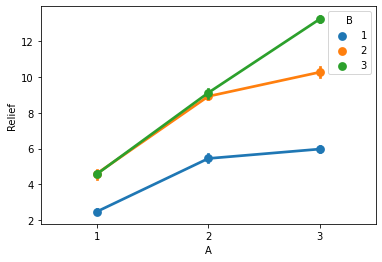

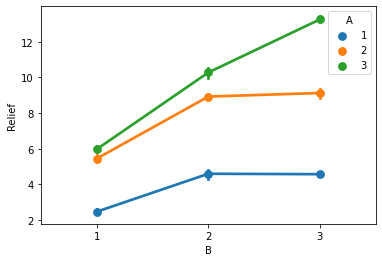

In [235]:
#1.4
# Below depicts the interaction between factors A and B towards relief
sns.pointplot(x = 'A', y = 'Relief', hue='B',data=df,ci=95)
plt.show()
sns.pointplot(x = 'B', y = 'Relief', hue='A',data=df,ci=95)
plt.show()

In [ ]:
#1.4
# Based on the interaction plot above there seems to be some interaction effect between A and B on the dependent variable relief as
# we can see the lines are not parallel between A2 and A3 within the range of B2 and B3.
# That is A3 and B3 seems to be have increased effect on the release going by the plot above.

Question 2 begins here

In [18]:
df_edu=pd.read_csv('EducationPost12thStandard.csv')
df_edu.head()
# Based on the information on the dataset except for Names every other dimension are numeric ones

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [19]:
#2.1 Exploratory data analysis begins here
df_edu.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [20]:
df_edu.describe()


Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.660232   79.702703   14.089704    22.743887   
std     677.071454   16.328155   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  103.000000  100.000000   39.800000    64.000000   

             Expend  Grad.Rate  
count    777.000000  777.00000  
mean    9660.171171   65.46332  
std     5221.768440   17.17771  
min     3186.000000   10.00000  
25%     6751.000000   53.00000  
50%     8377.000000   65.00000  
75%    10830.000000   78.00000  
max    56233.000000  118.00000

In [21]:
# Below is to understand about each variable in terms of if they tend to be discrete or continous
for i in df_edu.columns:
    print('Uniq number of values for %s is %d' %(i,df_edu[i].value_counts().count()))
    print('Percentage of unique values for %s on the entire data set is %2.2f%% ' %(i,(df_edu[i].value_counts().count()/df_edu[i].count())*100))
# Based on the output of the above code in combination with the data dictionary defintions we can safely assume columns other than Names as continous variables


Uniq number of values for Names is 777
Percentage of unique values for Names on the entire data set is 100.00% 
Uniq number of values for Apps is 711
Percentage of unique values for Apps on the entire data set is 91.51% 
Uniq number of values for Accept is 693
Percentage of unique values for Accept on the entire data set is 89.19% 
Uniq number of values for Enroll is 581
Percentage of unique values for Enroll on the entire data set is 74.77% 
Uniq number of values for Top10perc is 82
Percentage of unique values for Top10perc on the entire data set is 10.55% 
Uniq number of values for Top25perc is 89
Percentage of unique values for Top25perc on the entire data set is 11.45% 
Uniq number of values for F.Undergrad is 714
Percentage of unique values for F.Undergrad on the entire data set is 91.89% 
Uniq number of values for P.Undergrad is 566
Percentage of unique values for P.Undergrad on the entire data set is 72.84% 
Uniq number of values for Outstate is 640
Percentage of unique values f

In [22]:
#2.1 Part A
#Univariate data analysis
df_edu.isnull().sum()

# Observation
#  There is no missing values across any of the  variables
#  Also considering all independent variables are integers we can rule out presence of junk characters or unusal values that 
# needs to be imputed for PCA.

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [23]:
#2.1 Part A
def check_normaldistrib(df_col):
    print('Mean is %f, Median is %f, Modes are ' %(np.mean(df_col), np.median(df_col)),end="")
    modelist=stats.mode(df_col)
    for i in range(1, len(modelist)):
        print(modelist[i])

def check_for_outliers(df_col):
    Q1 = df_col.quantile(0.25)
    Q3 =  df_col.quantile(0.75)
    IQR = Q3 - Q1
    return any((df_col < (Q1 - 1.5 * IQR)) | (df_col > (Q3 + 1.5 * IQR)))
  

In [24]:
#2.1 Part A
df_edu.skew().sort_values(ascending=True)

Terminal      -0.816542
PhD           -0.768170
Grad.Rate     -0.113777
Top25perc      0.259340
Room.Board     0.477356
Outstate       0.509278
perc.alumni    0.606891
S.F.Ratio      0.667435
Top10perc      1.413217
Personal       1.742497
F.Undergrad    2.610458
Enroll         2.690465
Accept         3.417727
Expend         3.459322
Books          3.485025
Apps           3.723750
P.Undergrad    5.692353
dtype: float64

In [9]:
#2.1 Part A
# Below function generate the boxplot, distplot and histogram to perform univariate analysis for the incoming dataframe as the 
# first parameter and based on the flag input for the second parameter it produces the results of the similar plots for the 
# original dataset for the back to back comparative view between the two dataframes.

def univariate_analysis(df_input, flag):
    ctr=0
    for i in df_input.columns:
        if i != 'Names':
            ctr=ctr+1;
            print('\n %d. Univariate analysis for %s \n' % (ctr, i))
            w, p_value=stats.shapiro(df_input[i])
            check_normaldistrib(df_input[i])
            if check_for_outliers(df_input[i]):
                print('Column %s has outliers' %(i))
            else:
                print('Column %s does not have outliers' %(i))
            plt.figure(figsize=(15,3))
            plt.subplot(1,3,1)
            sns.boxplot(df_input[i])
            plt.subplot(1,3,2)
            sns.distplot(df_input[i],hist=False)
            plt.subplot(1,3,3)
            plt.hist(df_input[i])
            plt.show()
            if p_value > 0.05:
                print('Column %s is normally distributed' %(i))
            else:
                print ('Column %s is not normally distributed' %(i))
            # Below snippet provides visual comparison of the univariate analysis between dataframe in first argument 
            #                                                                              vs the original data frame
            if flag == 1:
                df_input2=df_edu
                if i != 'Names':
                    print('\n %d. Original dataset: Univariate analysis for %s \n' % (ctr, i))
                    w, p_value=stats.shapiro(df_input2[i])
                    check_normaldistrib(df_input2[i])
                    if check_for_outliers(df_input2[i]):
                        print('Column %s has outliers' %(i))
                    else:
                        print('Column %s does not have outliers' %(i))
                    plt.figure(figsize=(15,3))
                    plt.subplot(1,3,1)
                    sns.boxplot(df_input2[i])
                    plt.subplot(1,3,2)
                    sns.distplot(df_input2[i],hist=False)
                    plt.subplot(1,3,3)
                    plt.hist(df_input2[i])
                    plt.show()
                    if p_value > 0.05:
                        print('Column %s is normally distributed' %(i))
                    else:
                        print ('Column %s is not normally distributed' %(i))


 1. Univariate analysis for Apps 

Mean is 3001.638353, Median is 1558.000000, Modes are [3]
Column Apps has outliers


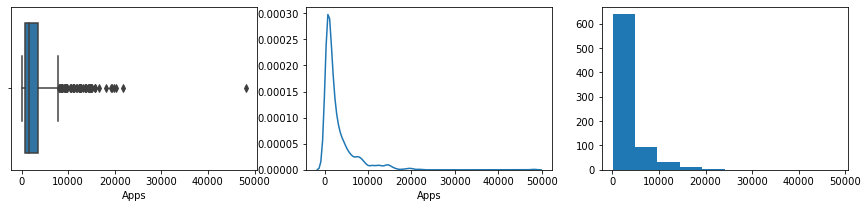

Column Apps is not normally distributed

 2. Univariate analysis for Accept 

Mean is 2018.804376, Median is 1110.000000, Modes are [4]
Column Accept has outliers


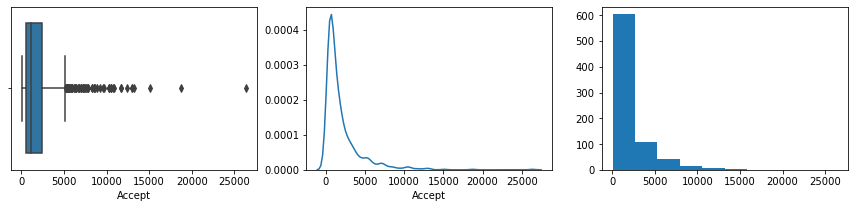

Column Accept is not normally distributed

 3. Univariate analysis for Enroll 

Mean is 779.972973, Median is 434.000000, Modes are [5]
Column Enroll has outliers


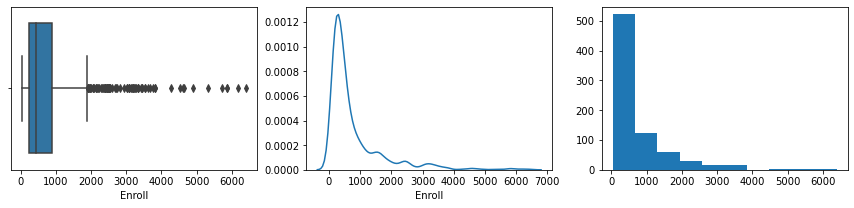

Column Enroll is not normally distributed

 4. Univariate analysis for Top10perc 

Mean is 27.558559, Median is 23.000000, Modes are [37]
Column Top10perc has outliers


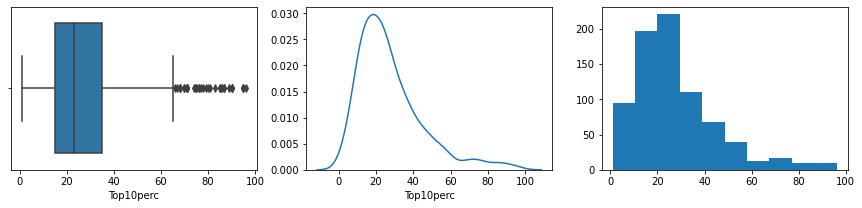

Column Top10perc is not normally distributed

 5. Univariate analysis for Top25perc 

Mean is 55.796654, Median is 54.000000, Modes are [20]
Column Top25perc does not have outliers


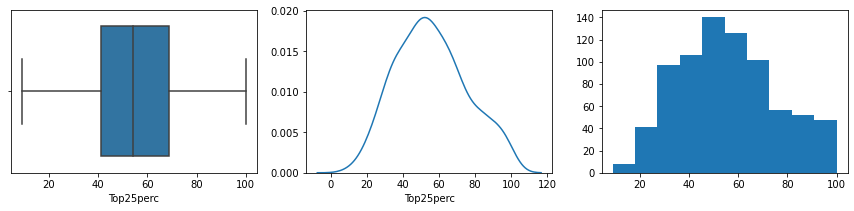

Column Top25perc is not normally distributed

 6. Univariate analysis for F.Undergrad 

Mean is 3699.907336, Median is 1707.000000, Modes are [3]
Column F.Undergrad has outliers


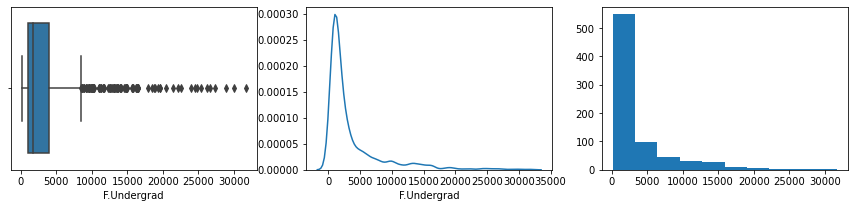

Column F.Undergrad is not normally distributed

 7. Univariate analysis for P.Undergrad 

Mean is 855.298584, Median is 353.000000, Modes are [7]
Column P.Undergrad has outliers


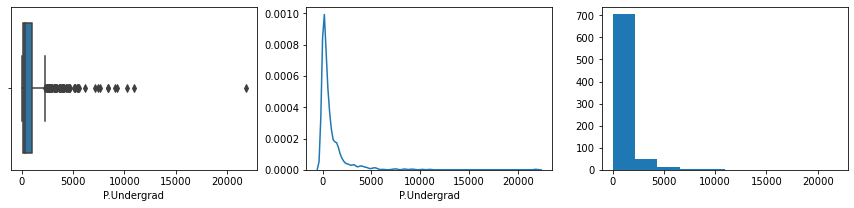

Column P.Undergrad is not normally distributed

 8. Univariate analysis for Outstate 

Mean is 10440.669241, Median is 9990.000000, Modes are [13]
Column Outstate has outliers


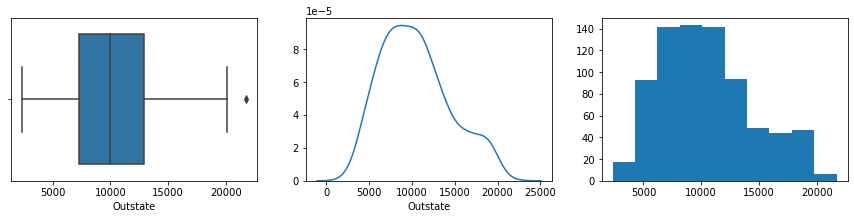

Column Outstate is not normally distributed

 9. Univariate analysis for Room.Board 

Mean is 4357.526384, Median is 4200.000000, Modes are [9]
Column Room.Board has outliers


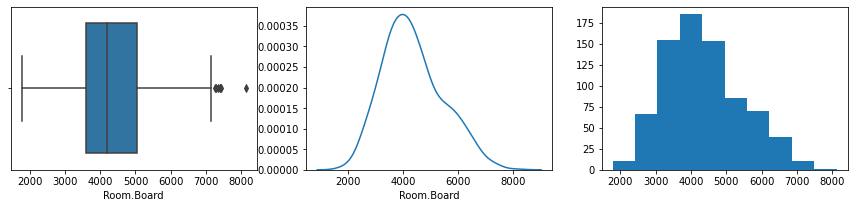

Column Room.Board is not normally distributed

 10. Univariate analysis for Books 

Mean is 549.380952, Median is 500.000000, Modes are [178]
Column Books has outliers


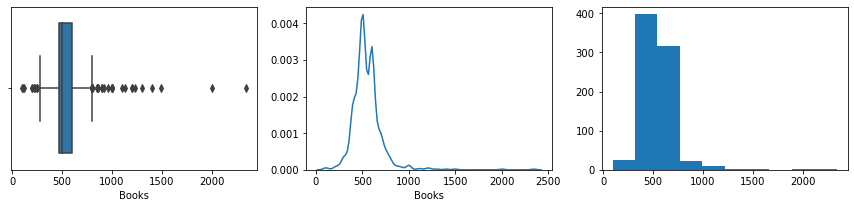

Column Books is not normally distributed

 11. Univariate analysis for Personal 

Mean is 1340.642214, Median is 1200.000000, Modes are [45]
Column Personal has outliers


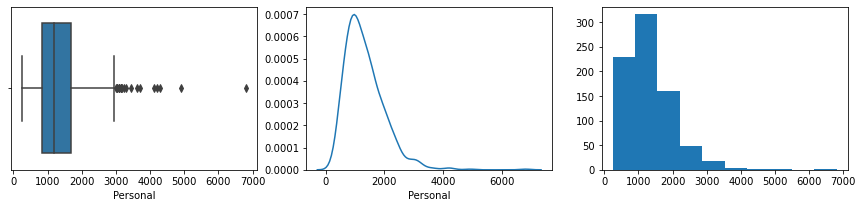

Column Personal is not normally distributed

 12. Univariate analysis for PhD 

Mean is 72.660232, Median is 75.000000, Modes are [26]
Column PhD has outliers


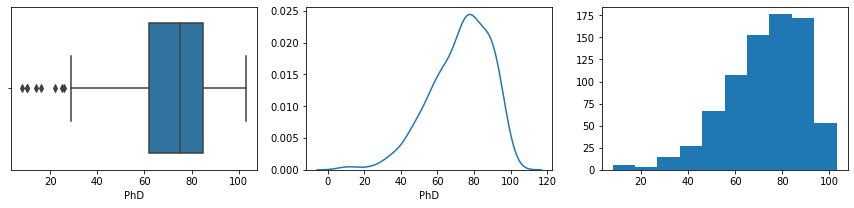

Column PhD is not normally distributed

 13. Univariate analysis for Terminal 

Mean is 79.702703, Median is 82.000000, Modes are [30]
Column Terminal has outliers


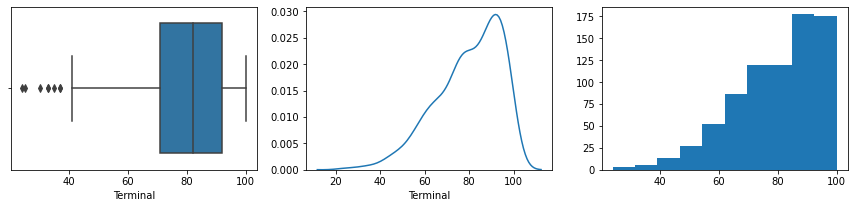

Column Terminal is not normally distributed

 14. Univariate analysis for S.F.Ratio 

Mean is 14.089704, Median is 13.600000, Modes are [15]
Column S.F.Ratio has outliers


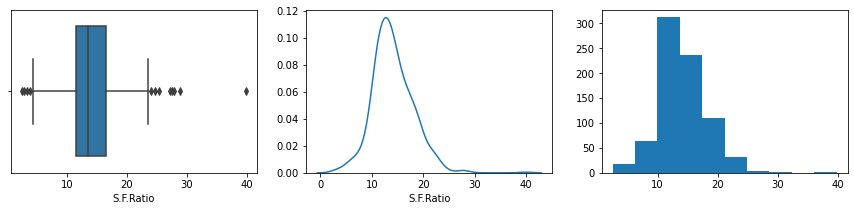

Column S.F.Ratio is not normally distributed

 15. Univariate analysis for perc.alumni 

Mean is 22.743887, Median is 21.000000, Modes are [32]
Column perc.alumni has outliers


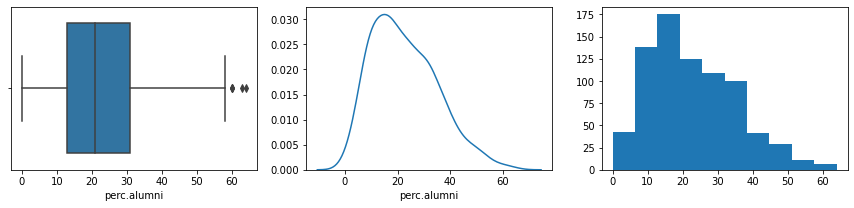

Column perc.alumni is not normally distributed

 16. Univariate analysis for Expend 

Mean is 9660.171171, Median is 8377.000000, Modes are [2]
Column Expend has outliers


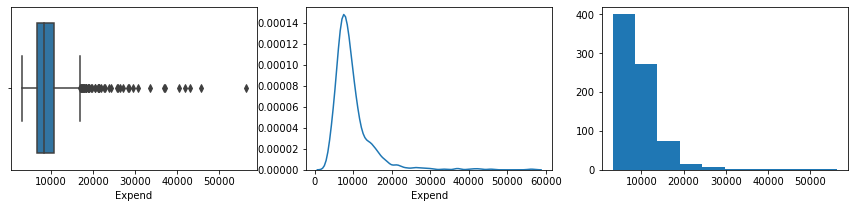

Column Expend is not normally distributed

 17. Univariate analysis for Grad.Rate 

Mean is 65.463320, Median is 65.000000, Modes are [24]
Column Grad.Rate has outliers


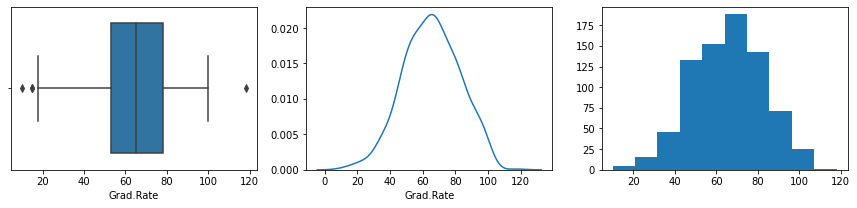

Column Grad.Rate is not normally distributed


In [25]:
#2.1 Part A
# Below function prints the distribution of data through boxplot, spread of the data through distribution plot without histogram
#                                        and the frequency plot through histogram for the original dataset
univariate_analysis(df_edu,0)

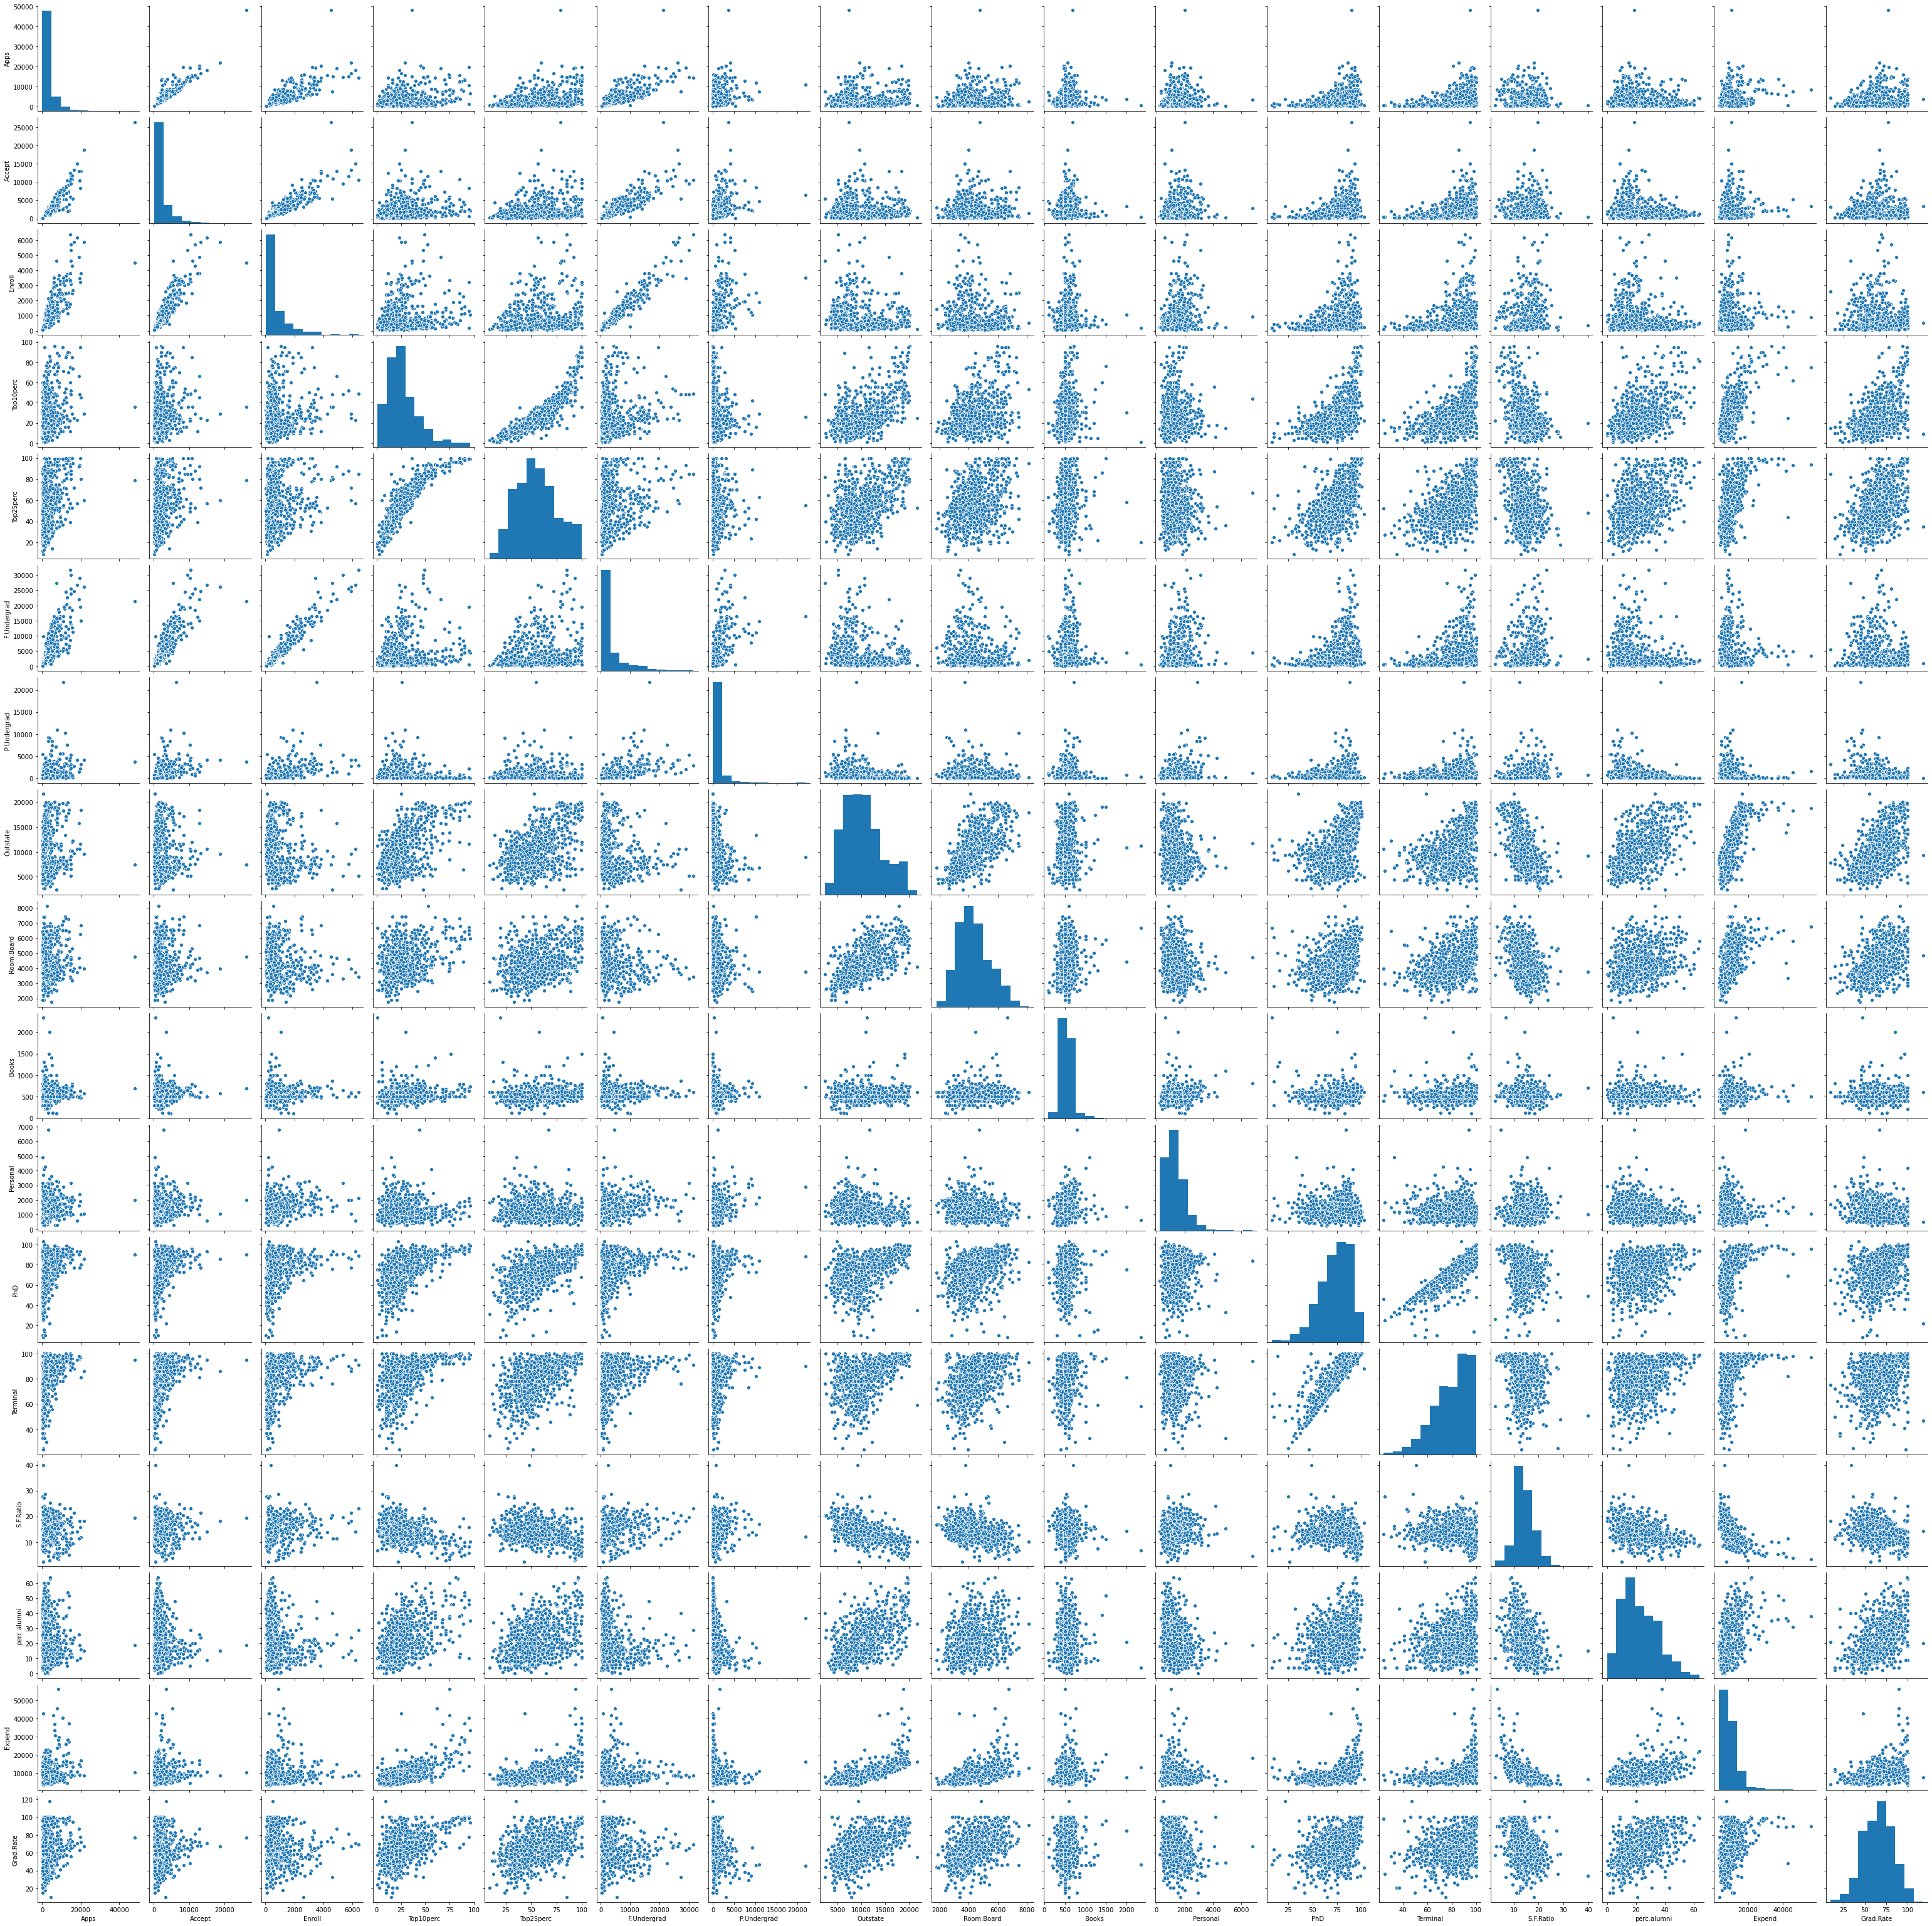

In [85]:
#2.1 Part B
# Multi variate analysis
sns.pairplot(df_edu)

In [96]:
#2.1 Part B
# Multivariate observations based on above pair plot
# While the above pair plot diplays the scatter plots for all combinations of pairs of columns from the original data set 
# aiding to visually observe relative the degree of correlation between the variables, the actual magnitude of correleation 
# can be found by the inbuilt pandas method namely corr() which returns the coefficient of corelation between the variables.



In [26]:
#2.1 Part B
df_edu.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

In [27]:
df_edu.cov()

Apps        Accept        Enroll     Top10perc  \
Apps         1.497846e+07  8.949860e+06  3.045256e+06  23132.773138   
Accept       8.949860e+06  6.007960e+06  2.076268e+06   8321.124872   
Enroll       3.045256e+06  2.076268e+06  8.633684e+05   2971.583415   
Top10perc    2.313277e+04  8.321125e+03  2.971583e+03    311.182456   
Top25perc    2.695266e+04  1.201340e+04  4.172592e+03    311.630480   
F.Undergrad  1.528970e+07  1.039358e+07  4.347530e+06  12089.113681   
P.Undergrad  2.346620e+06  1.646670e+06  7.257907e+05  -2829.474981   
Outstate     7.809704e+05 -2.539623e+05 -5.811885e+05  39907.179832   
Room.Board   7.000729e+05  2.443471e+05 -4.099706e+04   7186.705605   
Books        8.470375e+04  4.594281e+04  1.729120e+04    346.177405   
Personal     4.683468e+05  3.335566e+05  1.767380e+05  -1114.551186   
PhD          2.468943e+04  1.423820e+04  5.028961e+03    153.184870   
Terminal     2.105307e+04  1.218209e+04  4.217086e+03    127.551581   
S.F.Ratio    1.465061e+03  1.709838e+03  8.726848e+02    -26.874525   
perc.alumni -4.327122e+03 -4.859487e+03 -2.081694e+03     99.567208   
Expend       5.246171e+06  1.596272e+06  3.113454e+05  60879.310196   
Grad.Rate    9.756422e+03  2.834163e+03 -3.565880e+02    149.992164   

                Top25perc   F.Undergrad   P.Undergrad      Outstate  \
Apps         26952.663479  1.528970e+07  2.346620e+06  7.809704e+05   
Accept       12013.404757  1.039358e+07  1.646670e+06 -2.539623e+05   
Enroll        4172.592435  4.347530e+06  7.257907e+05 -5.811885e+05   
Top10perc      311.630480  1.208911e+04 -2.829475e+03  3.990718e+04   
Top25perc      392.229216  1.915895e+04 -1.615412e+03  3.899243e+04   
F.Undergrad  19158.952782  2.352658e+07  4.212910e+06 -4.209843e+06   
P.Undergrad  -1615.412144  4.212910e+06  2.317799e+06 -1.552704e+06   
Outstate     38992.427500 -4.209843e+06 -1.552704e+06  1.618466e+07   
Room.Board    7199.903568 -3.664582e+05 -1.023919e+05  2.886597e+06   
Books          377.759266  9.253576e+04  2.041045e+04  2.580824e+04   
Personal     -1083.605065  1.041709e+06  3.297324e+05 -8.146737e+05   
PhD            176.518449  2.521178e+04  3.706756e+03  2.515752e+04   
Terminal       153.002612  2.142424e+04  3.180597e+03  2.416415e+04   
S.F.Ratio      -23.097199  5.370209e+03  1.401303e+03 -8.835254e+03   
perc.alumni    102.550946 -1.379193e+04 -5.297337e+03  2.822955e+04   
Expend       54546.483305  4.724040e+05 -6.643512e+05  1.413324e+07   
Grad.Rate      162.371398 -6.563308e+03 -6.721062e+03  3.947968e+04   

               Room.Board         Books      Personal           PhD  \
Apps         7.000729e+05  84703.752639  4.683468e+05  24689.433666   
Accept       2.443471e+05  45942.807867  3.335566e+05  14238.201489   
Enroll      -4.099706e+04  17291.199742  1.767380e+05   5028.961166   
Top10perc    7.186706e+03    346.177405 -1.114551e+03    153.184870   
Top25perc    7.199904e+03    377.759266 -1.083605e+03    176.518449   
F.Undergrad -3.664582e+05  92535.764728  1.041709e+06  25211.784197   
P.Undergrad -1.023919e+05  20410.446674  3.297324e+05   3706.756219   
Outstate     2.886597e+06  25808.242145 -8.146737e+05  25157.515051   
Room.Board   1.202743e+06  23170.313390 -1.480838e+05   5895.034749   
Books        2.317031e+04  27259.779946  2.004303e+04     72.534242   
Personal    -1.480838e+05  20043.025650  4.584258e+05   -120.898783   
PhD          5.895035e+03     72.534242 -1.208988e+02    266.608636   
Terminal     6.047300e+03    242.963918 -3.051542e+02    204.231332   
S.F.Ratio   -1.574206e+03    -20.867207  3.654158e+02     -8.436492   
perc.alumni  3.701431e+03    -82.263132 -2.399311e+03     50.383230   
Expend       2.873308e+06  96912.580326 -3.460978e+05  36898.058233   
Grad.Rate    8.005360e+03      3.008837 -3.132615e+03     85.557109   

                 Terminal     S.F.Ratio   perc.alumni        Expend  \
Apps         21053.067602   1465.060576  -4327.122381  5.246171e+06   
Accept       12182.093828   1709.838189  -

In [98]:
#2.1 Part B
# Observations on Correlation
# Highly and positively correlated:
#   Apps with Accept, Enroll and F_Undergrad
#   Accept with Enroll and F.Undergrad
#   Top10perc with Top25perc
#   Room.Board somewhat with Outstate
#   Terminal with PhD

# Low correlations with positive linearity:
#   Books and Personal are comparatively least corelated with every other variable. 

# Negative correlations
#  S.F. Ratio has the maximum negative corelation with any variables namely Expend and Outstate


<AxesSubplot:>

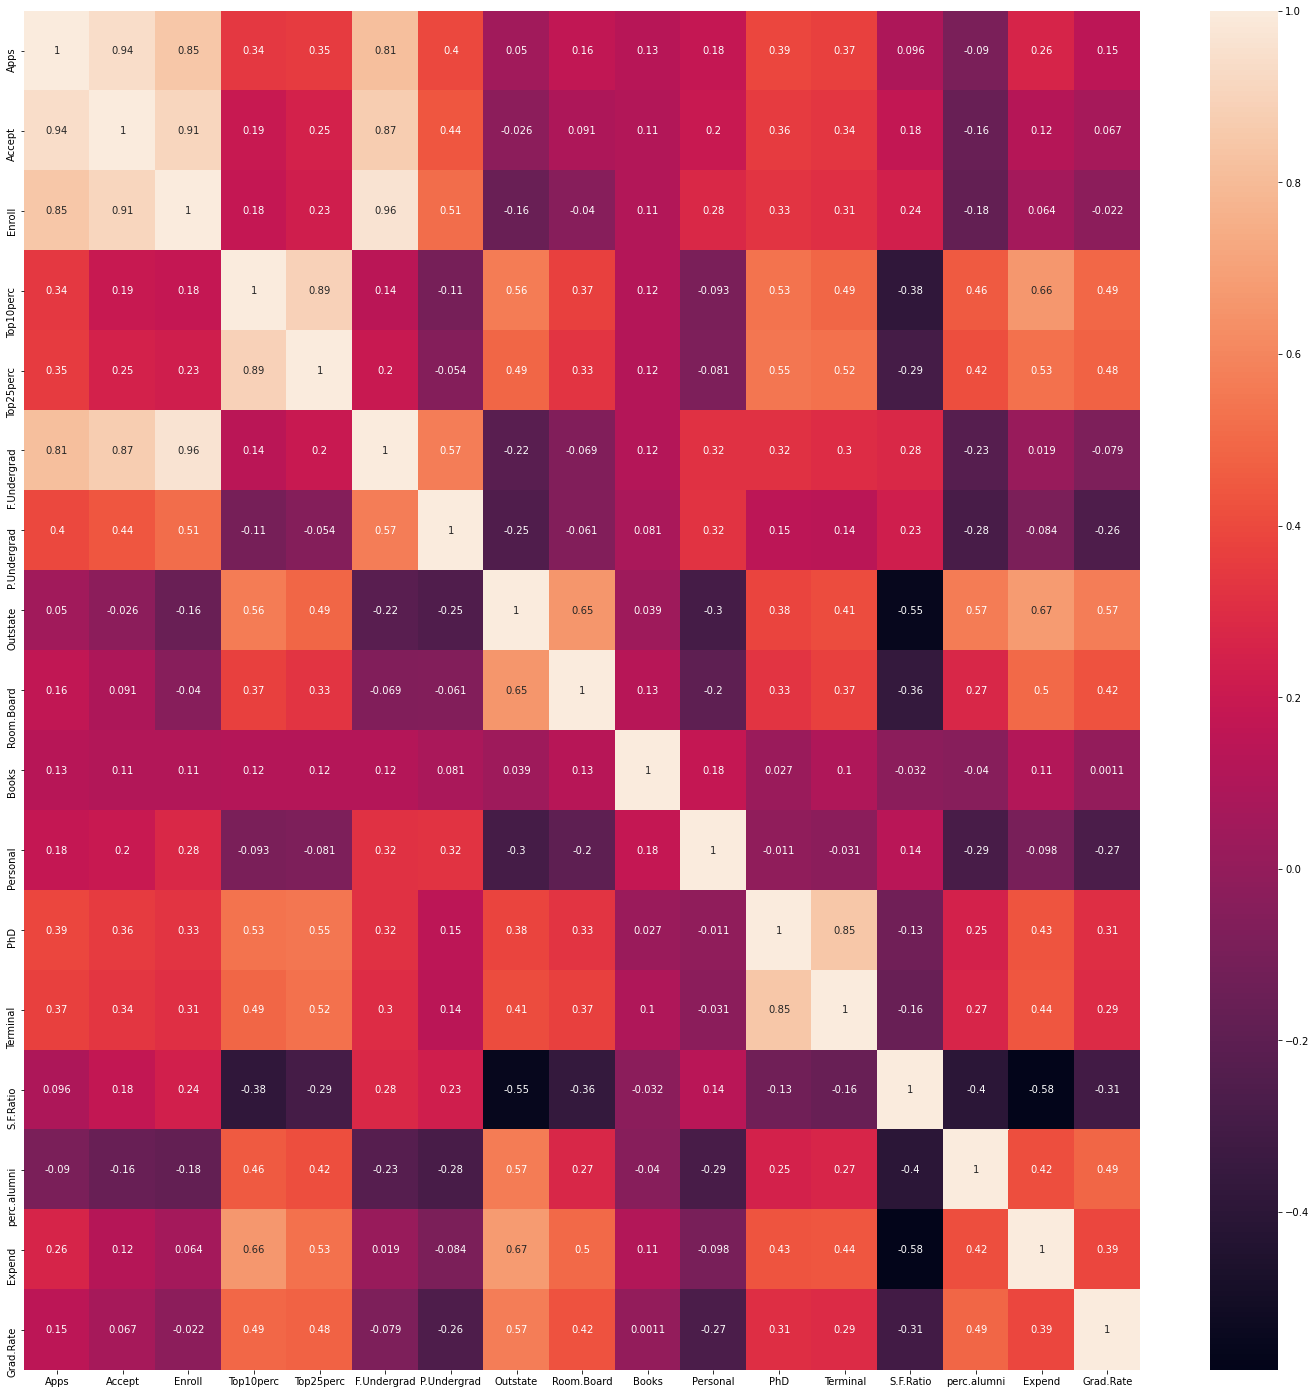

In [28]:
#2.1 Part B
plt.figure(figsize=(25,25))
sns.heatmap(df_edu.corr(), annot=True)  # plot the correlation coefficients as a heatmap
#  The visual below depicts the manual observations done about the correlation with dark shades indicating inverse correlation 
# and light shades indicating positive correlation

In [29]:
#2.2
Q1_original = df_edu.quantile(0.25)
Q3_original = df_edu.quantile(0.75)
IQR_original = Q3_original - Q1_original



A.Univariate analysis after standardizing the original dataset
--------------------------------------------------------------

 1. Univariate analysis for Apps 

Mean is 0.000000, Median is -0.373254, Modes are [3]
Column Apps has outliers


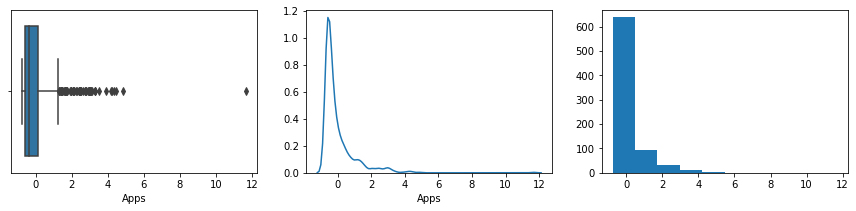

Column Apps is not normally distributed

 1. Original dataset: Univariate analysis for Apps 

Mean is 3001.638353, Median is 1558.000000, Modes are [3]
Column Apps has outliers


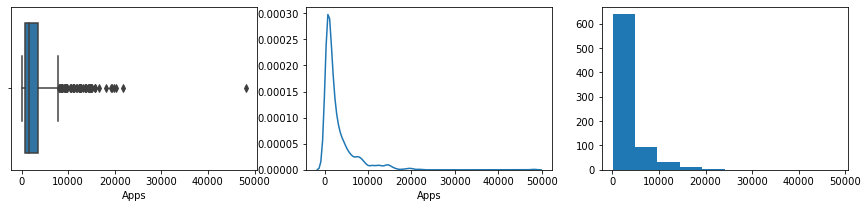

Column Apps is not normally distributed

 2. Univariate analysis for Accept 

Mean is 0.000000, Median is -0.371011, Modes are [4]
Column Accept has outliers


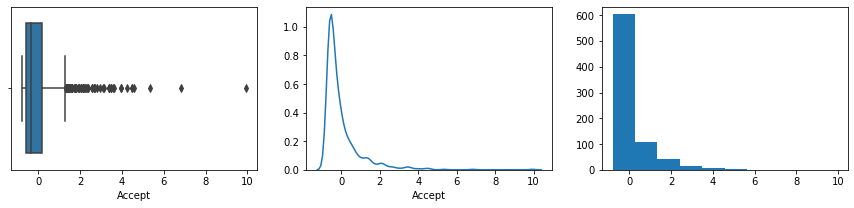

Column Accept is not normally distributed

 2. Original dataset: Univariate analysis for Accept 

Mean is 2018.804376, Median is 1110.000000, Modes are [4]
Column Accept has outliers


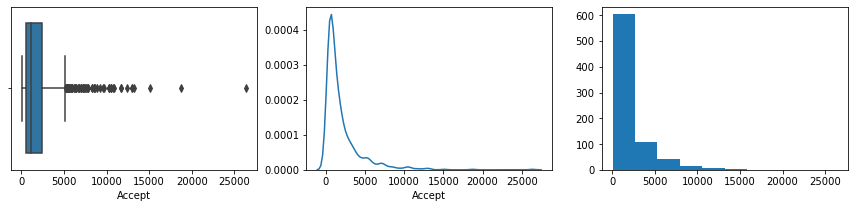

Column Accept is not normally distributed

 3. Univariate analysis for Enroll 

Mean is -0.000000, Median is -0.372584, Modes are [5]
Column Enroll has outliers


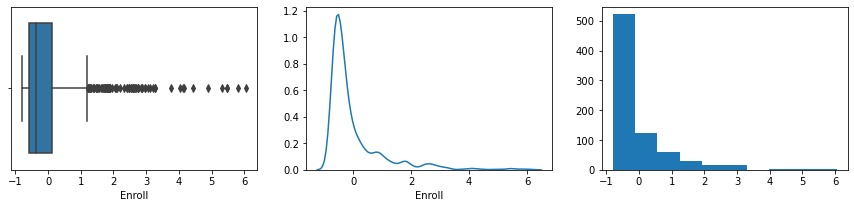

Column Enroll is not normally distributed

 3. Original dataset: Univariate analysis for Enroll 

Mean is 779.972973, Median is 434.000000, Modes are [5]
Column Enroll has outliers


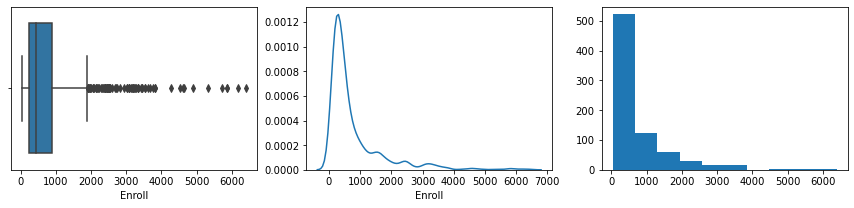

Column Enroll is not normally distributed

 4. Univariate analysis for Top10perc 

Mean is -0.000000, Median is -0.258583, Modes are [37]
Column Top10perc has outliers


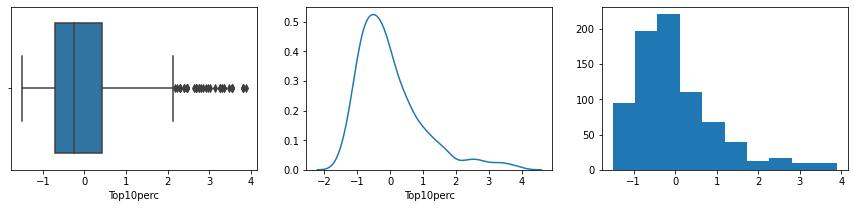

Column Top10perc is not normally distributed

 4. Original dataset: Univariate analysis for Top10perc 

Mean is 27.558559, Median is 23.000000, Modes are [37]
Column Top10perc has outliers


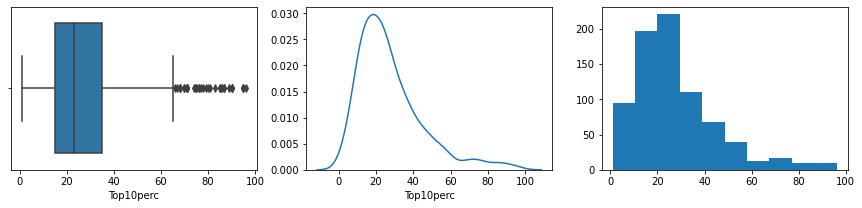

Column Top10perc is not normally distributed

 5. Univariate analysis for Top25perc 

Mean is -0.000000, Median is -0.090777, Modes are [20]
Column Top25perc does not have outliers


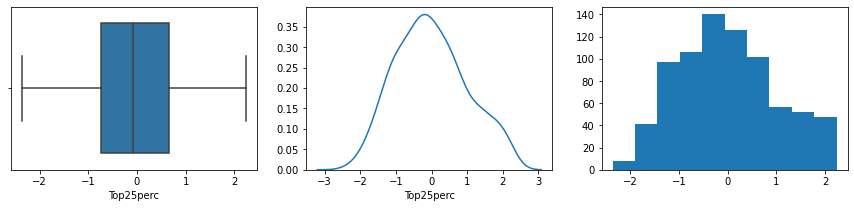

Column Top25perc is not normally distributed

 5. Original dataset: Univariate analysis for Top25perc 

Mean is 55.796654, Median is 54.000000, Modes are [20]
Column Top25perc does not have outliers


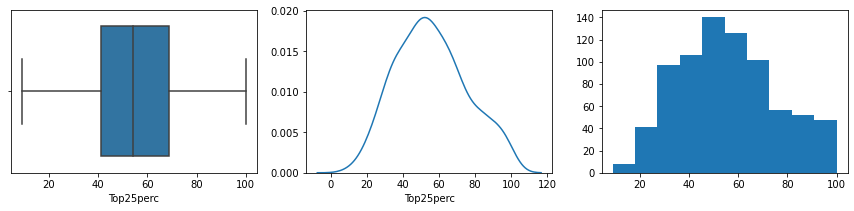

Column Top25perc is not normally distributed

 6. Univariate analysis for F.Undergrad 

Mean is -0.000000, Median is -0.411138, Modes are [3]
Column F.Undergrad has outliers


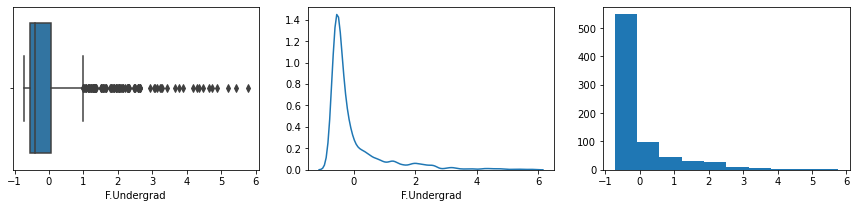

Column F.Undergrad is not normally distributed

 6. Original dataset: Univariate analysis for F.Undergrad 

Mean is 3699.907336, Median is 1707.000000, Modes are [3]
Column F.Undergrad has outliers


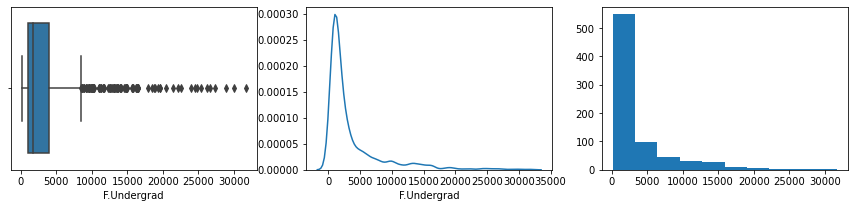

Column F.Undergrad is not normally distributed

 7. Univariate analysis for P.Undergrad 

Mean is -0.000000, Median is -0.330144, Modes are [7]
Column P.Undergrad has outliers


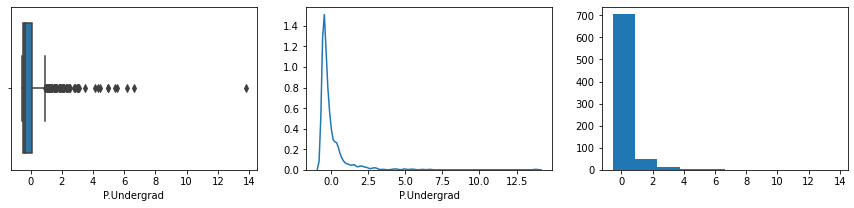

Column P.Undergrad is not normally distributed

 7. Original dataset: Univariate analysis for P.Undergrad 

Mean is 855.298584, Median is 353.000000, Modes are [7]
Column P.Undergrad has outliers


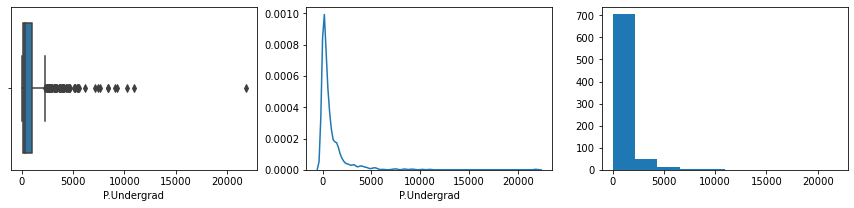

Column P.Undergrad is not normally distributed

 8. Univariate analysis for Outstate 

Mean is 0.000000, Median is -0.112095, Modes are [13]
Column Outstate has outliers


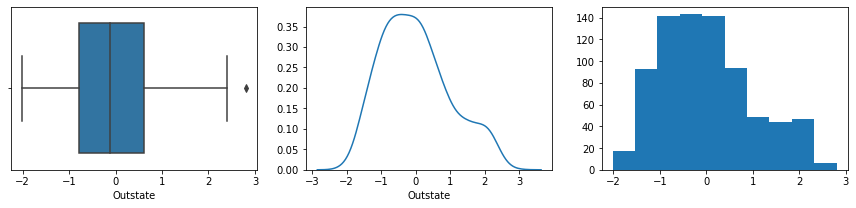

Column Outstate is not normally distributed

 8. Original dataset: Univariate analysis for Outstate 

Mean is 10440.669241, Median is 9990.000000, Modes are [13]
Column Outstate has outliers


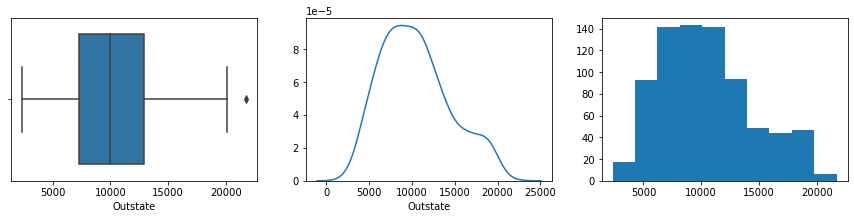

Column Outstate is not normally distributed

 9. Univariate analysis for Room.Board 

Mean is 0.000000, Median is -0.143730, Modes are [9]
Column Room.Board has outliers


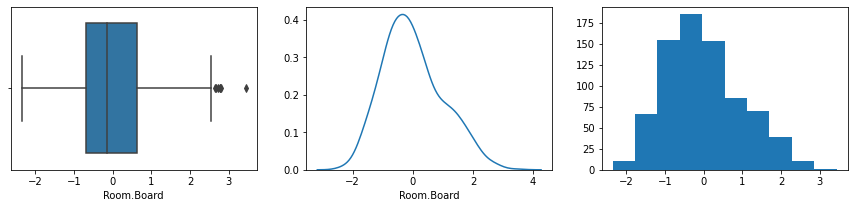

Column Room.Board is not normally distributed

 9. Original dataset: Univariate analysis for Room.Board 

Mean is 4357.526384, Median is 4200.000000, Modes are [9]
Column Room.Board has outliers


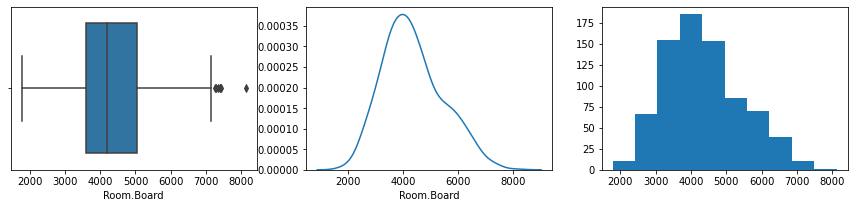

Column Room.Board is not normally distributed

 10. Univariate analysis for Books 

Mean is -0.000000, Median is -0.299280, Modes are [178]
Column Books has outliers


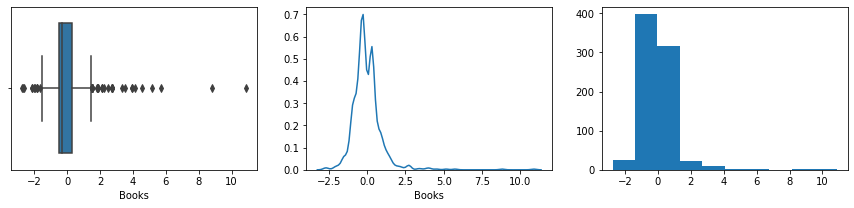

Column Books is not normally distributed

 10. Original dataset: Univariate analysis for Books 

Mean is 549.380952, Median is 500.000000, Modes are [178]
Column Books has outliers


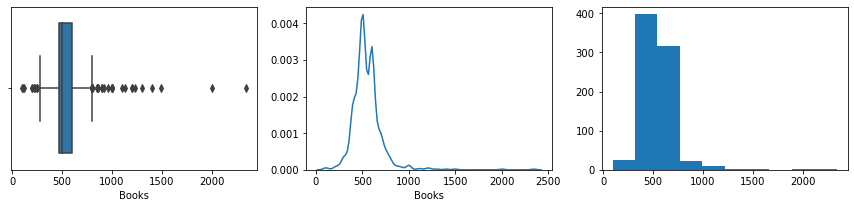

Column Books is not normally distributed

 11. Univariate analysis for Personal 

Mean is 0.000000, Median is -0.207855, Modes are [45]
Column Personal has outliers


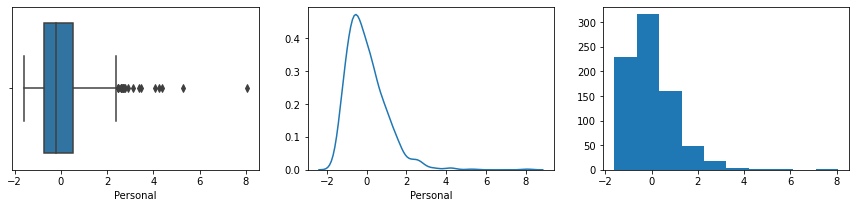

Column Personal is not normally distributed

 11. Original dataset: Univariate analysis for Personal 

Mean is 1340.642214, Median is 1200.000000, Modes are [45]
Column Personal has outliers


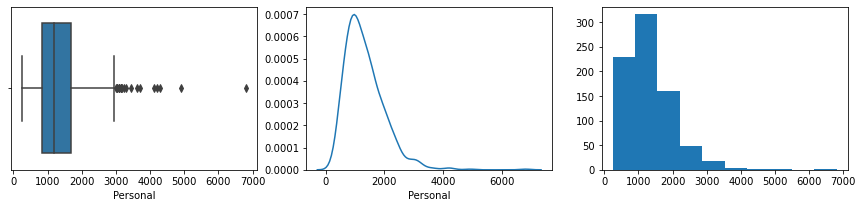

Column Personal is not normally distributed

 12. Univariate analysis for PhD 

Mean is 0.000000, Median is 0.143389, Modes are [26]
Column PhD has outliers


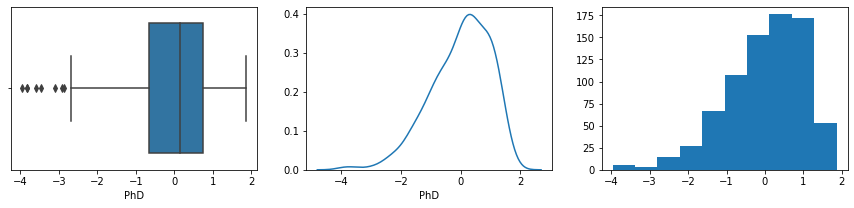

Column PhD is not normally distributed

 12. Original dataset: Univariate analysis for PhD 

Mean is 72.660232, Median is 75.000000, Modes are [26]
Column PhD has outliers


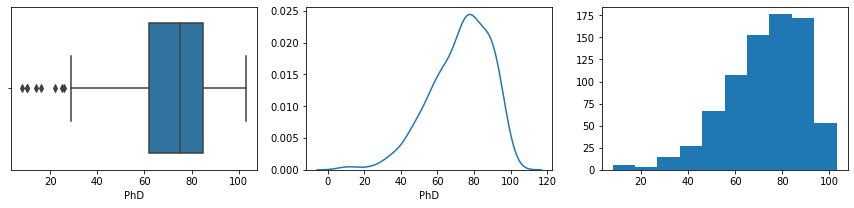

Column PhD is not normally distributed

 13. Univariate analysis for Terminal 

Mean is -0.000000, Median is 0.156142, Modes are [30]
Column Terminal has outliers


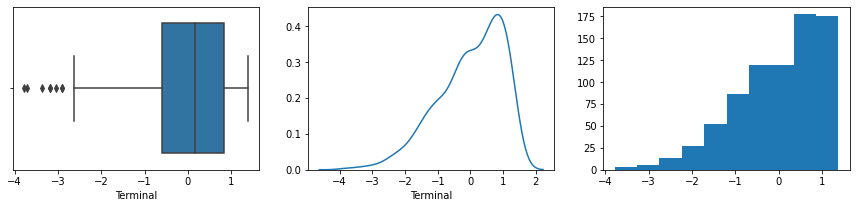

Column Terminal is not normally distributed

 13. Original dataset: Univariate analysis for Terminal 

Mean is 79.702703, Median is 82.000000, Modes are [30]
Column Terminal has outliers


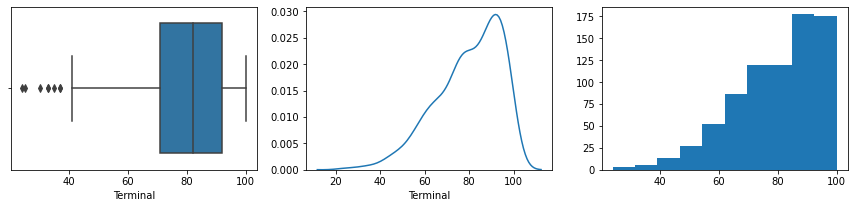

Column Terminal is not normally distributed

 14. Univariate analysis for S.F.Ratio 

Mean is -0.000000, Median is -0.123794, Modes are [15]
Column S.F.Ratio has outliers


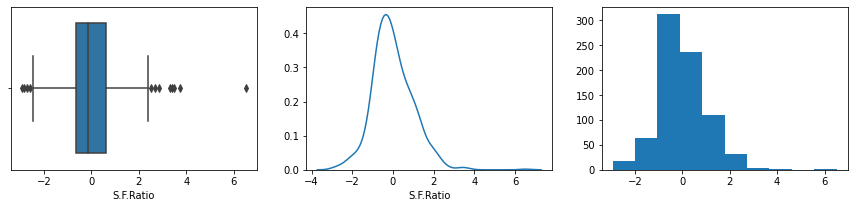

Column S.F.Ratio is not normally distributed

 14. Original dataset: Univariate analysis for S.F.Ratio 

Mean is 14.089704, Median is 13.600000, Modes are [15]
Column S.F.Ratio has outliers


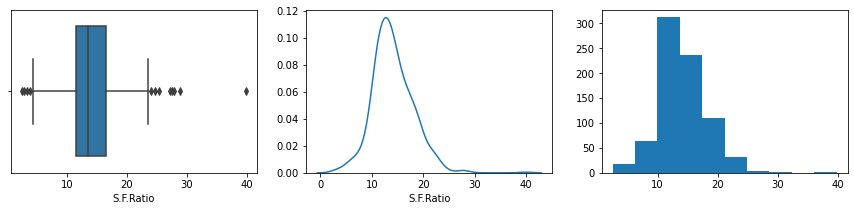

Column S.F.Ratio is not normally distributed

 15. Univariate analysis for perc.alumni 

Mean is -0.000000, Median is -0.140820, Modes are [32]
Column perc.alumni has outliers


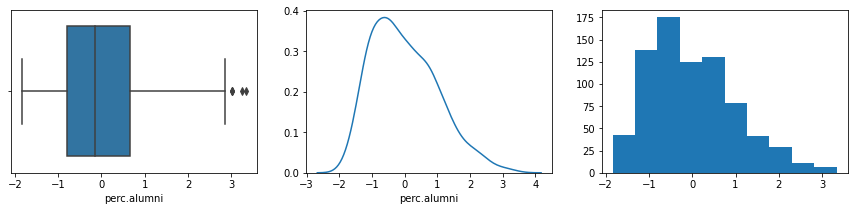

Column perc.alumni is not normally distributed

 15. Original dataset: Univariate analysis for perc.alumni 

Mean is 22.743887, Median is 21.000000, Modes are [32]
Column perc.alumni has outliers


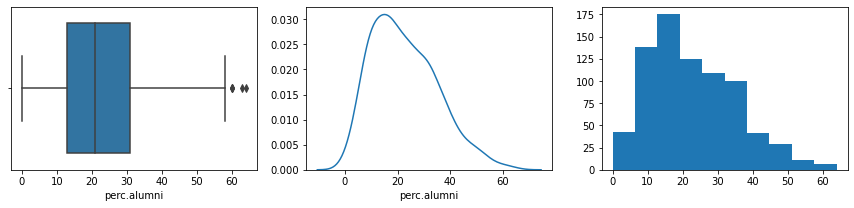

Column perc.alumni is not normally distributed

 16. Univariate analysis for Expend 

Mean is 0.000000, Median is -0.245893, Modes are [2]
Column Expend has outliers


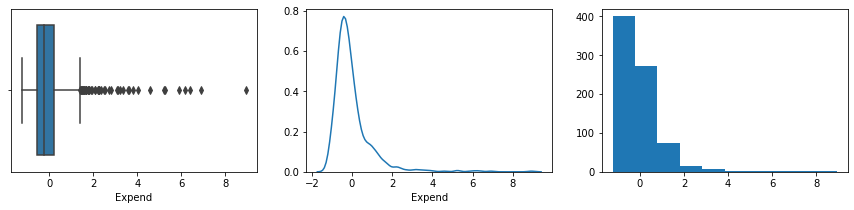

Column Expend is not normally distributed

 16. Original dataset: Univariate analysis for Expend 

Mean is 9660.171171, Median is 8377.000000, Modes are [2]
Column Expend has outliers


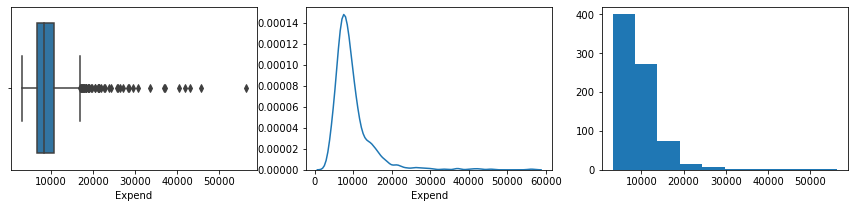

Column Expend is not normally distributed

 17. Univariate analysis for Grad.Rate 

Mean is 0.000000, Median is -0.026990, Modes are [24]
Column Grad.Rate has outliers


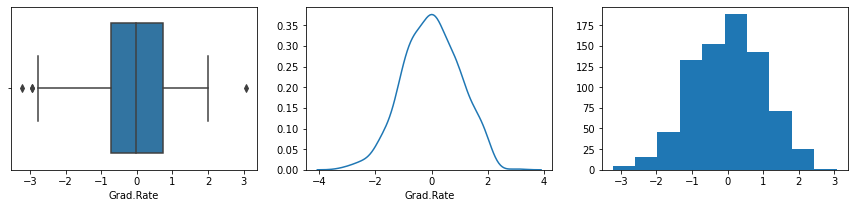

Column Grad.Rate is not normally distributed

 17. Original dataset: Univariate analysis for Grad.Rate 

Mean is 65.463320, Median is 65.000000, Modes are [24]
Column Grad.Rate has outliers


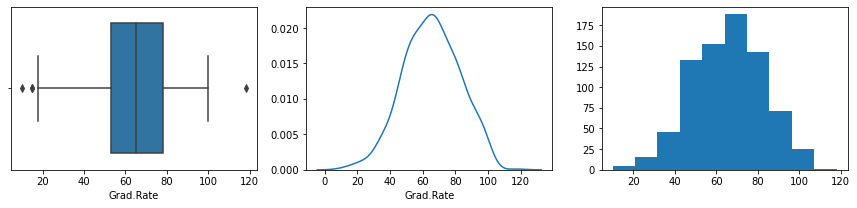

Column Grad.Rate is not normally distributed
There are 584 outliers across variables in the original unscaled dataset
There are 586 outliers across variables in the scaled dataset


In [34]:
#2.2
# Below 3 cells compares the scaling outcome for various scaling approaches
# A. Below is for standard scaler (please this is not yet a recommended scaling option and this is just a test to showcase)
from sklearn.preprocessing import StandardScaler
df_new=df_edu.copy()
df_new.drop(columns='Names',inplace=True)
stdscaler =  StandardScaler()
for i in df_new.columns:
    df_new[i]= stdscaler.fit_transform(df_edu[[i]]) 
print('A.Univariate analysis after standardizing the original dataset')
print('--------------------------------------------------------------')
# Find the interquartile range for this scaled data set
univariate_analysis(df_new,1)
Q1 = df_new.quantile(0.25)
Q3 = df_new.quantile(0.75)
IQR = Q3 - Q1
print('There are %d outliers across variables in the original unscaled dataset' %(len(np.where(df_edu > Q3_original + (1.5 * IQR_original))[0])+len( np.where(df_edu < Q1_original - (1.5 * IQR_original))[0])))
print('There are %d outliers across variables in the scaled dataset' %(len(np.where(df_new > Q3 + (1.5 * IQR))[0])+len( np.where(df_new < Q1 - (1.5 * IQR))[0])))

B.Univariate analysis after normalizing the original dataset
----------------------------------------------------------

 1. Univariate analysis for Apps 

Mean is 0.060830, Median is 0.030763, Modes are [3]
Column Apps has outliers


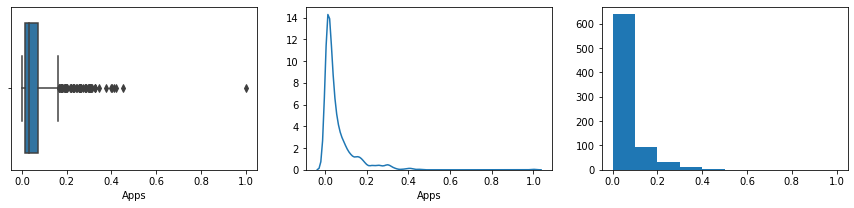

Column Apps is not normally distributed

 1. Original dataset: Univariate analysis for Apps 

Mean is 3001.638353, Median is 1558.000000, Modes are [3]
Column Apps has outliers


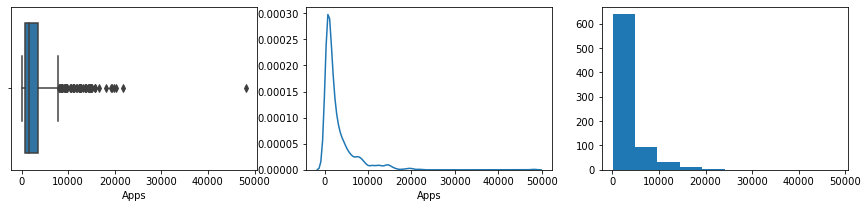

Column Apps is not normally distributed

 2. Univariate analysis for Accept 

Mean is 0.074141, Median is 0.039531, Modes are [4]
Column Accept has outliers


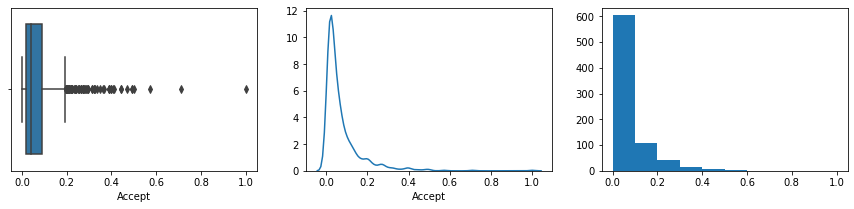

Column Accept is not normally distributed

 2. Original dataset: Univariate analysis for Accept 

Mean is 2018.804376, Median is 1110.000000, Modes are [4]
Column Accept has outliers


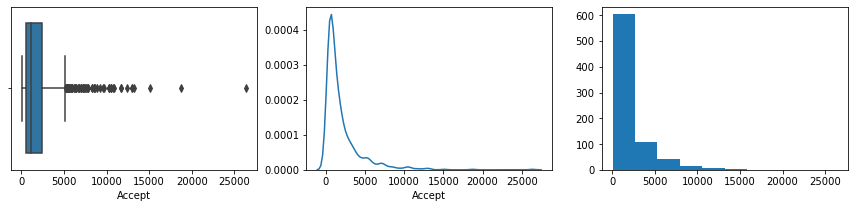

Column Accept is not normally distributed

 3. Univariate analysis for Enroll 

Mean is 0.117189, Median is 0.062765, Modes are [5]
Column Enroll has outliers


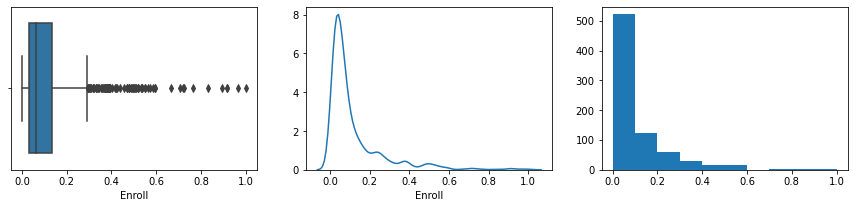

Column Enroll is not normally distributed

 3. Original dataset: Univariate analysis for Enroll 

Mean is 779.972973, Median is 434.000000, Modes are [5]
Column Enroll has outliers


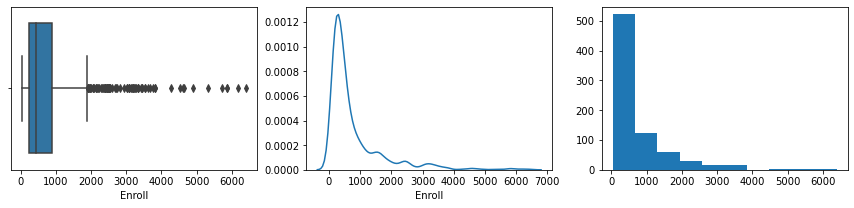

Column Enroll is not normally distributed

 4. Univariate analysis for Top10perc 

Mean is 0.279564, Median is 0.231579, Modes are [37]
Column Top10perc has outliers


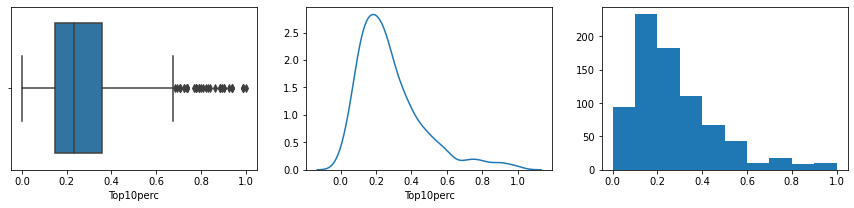

Column Top10perc is not normally distributed

 4. Original dataset: Univariate analysis for Top10perc 

Mean is 27.558559, Median is 23.000000, Modes are [37]
Column Top10perc has outliers


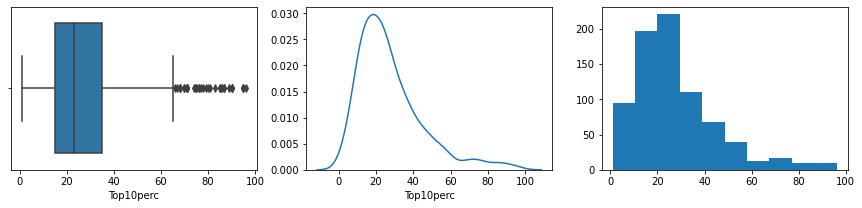

Column Top10perc is not normally distributed

 5. Univariate analysis for Top25perc 

Mean is 0.514249, Median is 0.494505, Modes are [20]
Column Top25perc does not have outliers


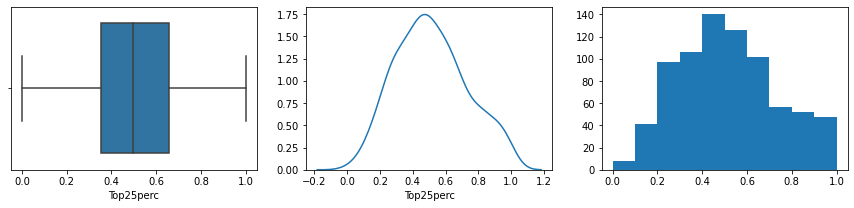

Column Top25perc is not normally distributed

 5. Original dataset: Univariate analysis for Top25perc 

Mean is 55.796654, Median is 54.000000, Modes are [20]
Column Top25perc does not have outliers


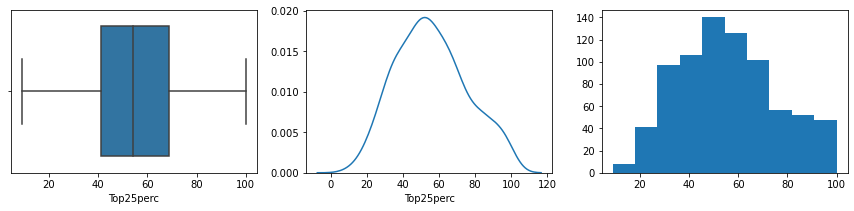

Column Top25perc is not normally distributed

 6. Univariate analysis for F.Undergrad 

Mean is 0.113030, Median is 0.049771, Modes are [3]
Column F.Undergrad has outliers


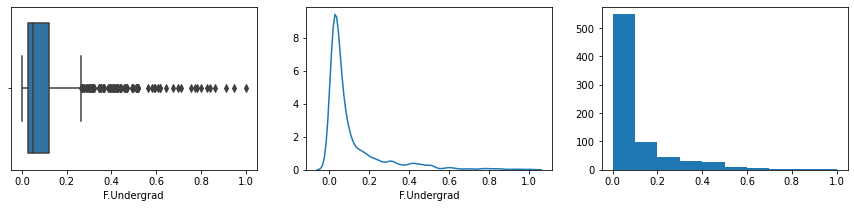

Column F.Undergrad is not normally distributed

 6. Original dataset: Univariate analysis for F.Undergrad 

Mean is 3699.907336, Median is 1707.000000, Modes are [3]
Column F.Undergrad has outliers


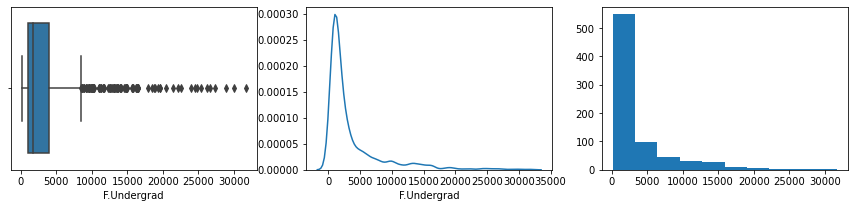

Column F.Undergrad is not normally distributed

 7. Univariate analysis for P.Undergrad 

Mean is 0.039125, Median is 0.016121, Modes are [7]
Column P.Undergrad has outliers


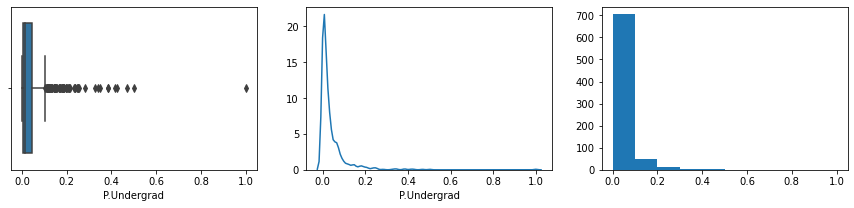

Column P.Undergrad is not normally distributed

 7. Original dataset: Univariate analysis for P.Undergrad 

Mean is 855.298584, Median is 353.000000, Modes are [7]
Column P.Undergrad has outliers


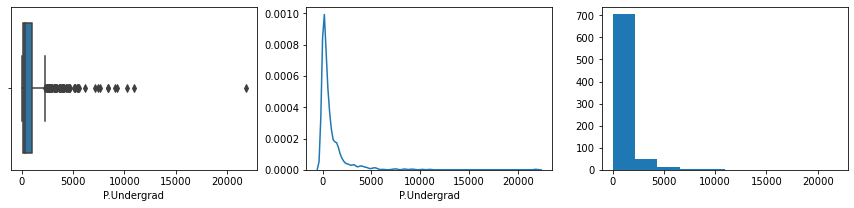

Column P.Undergrad is not normally distributed

 8. Univariate analysis for Outstate 

Mean is 0.418423, Median is 0.395145, Modes are [13]
Column Outstate has outliers


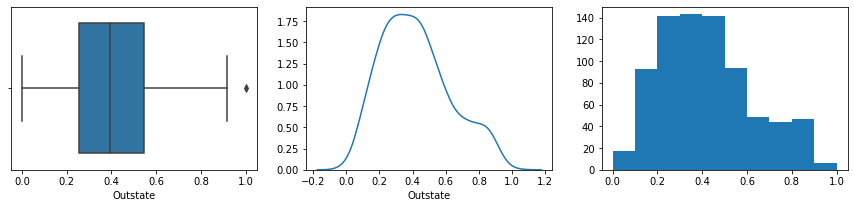

Column Outstate is not normally distributed

 8. Original dataset: Univariate analysis for Outstate 

Mean is 10440.669241, Median is 9990.000000, Modes are [13]
Column Outstate has outliers


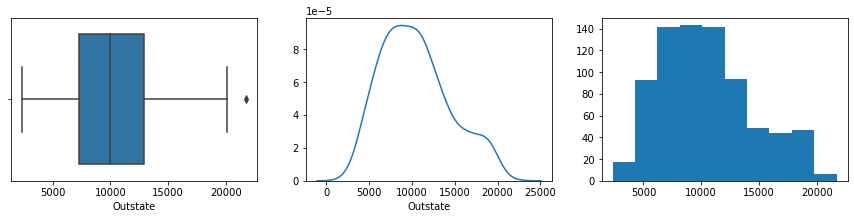

Column Outstate is not normally distributed

 9. Univariate analysis for Room.Board 

Mean is 0.406294, Median is 0.381463, Modes are [9]
Column Room.Board has outliers


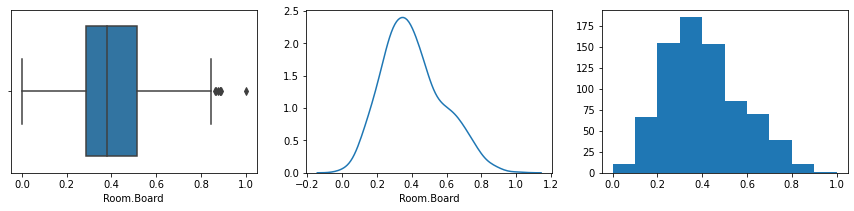

Column Room.Board is not normally distributed

 9. Original dataset: Univariate analysis for Room.Board 

Mean is 4357.526384, Median is 4200.000000, Modes are [9]
Column Room.Board has outliers


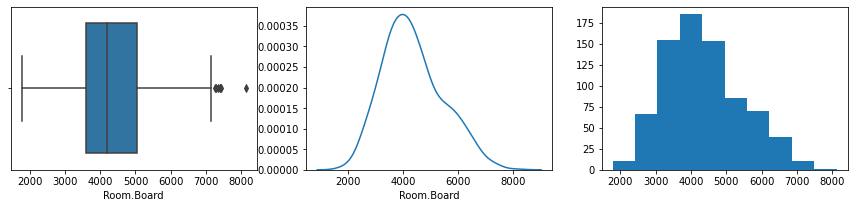

Column Room.Board is not normally distributed

 10. Univariate analysis for Books 

Mean is 0.202041, Median is 0.180036, Modes are [178]
Column Books has outliers


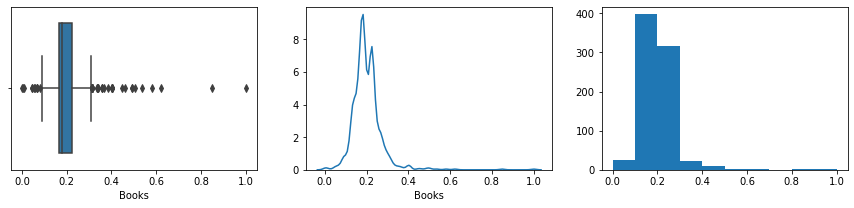

Column Books is not normally distributed

 10. Original dataset: Univariate analysis for Books 

Mean is 549.380952, Median is 500.000000, Modes are [178]
Column Books has outliers


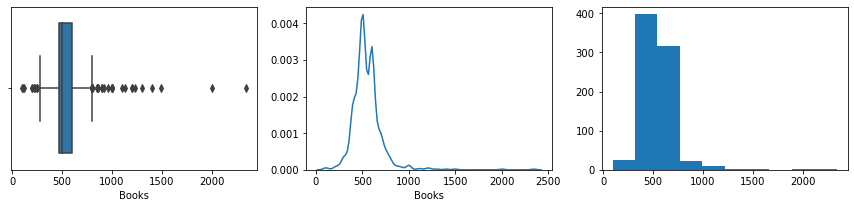

Column Books is not normally distributed

 11. Univariate analysis for Personal 

Mean is 0.166510, Median is 0.145038, Modes are [45]
Column Personal has outliers


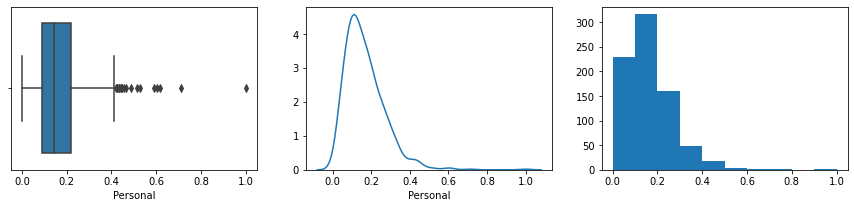

Column Personal is not normally distributed

 11. Original dataset: Univariate analysis for Personal 

Mean is 1340.642214, Median is 1200.000000, Modes are [45]
Column Personal has outliers


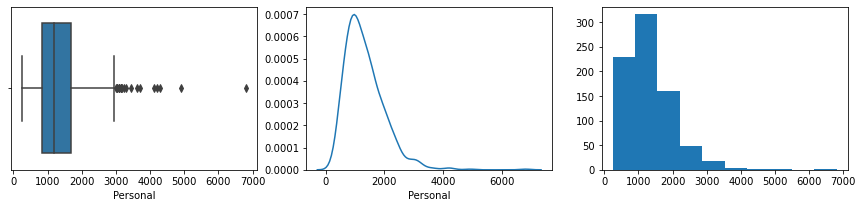

Column Personal is not normally distributed

 12. Univariate analysis for PhD 

Mean is 0.680634, Median is 0.705263, Modes are [26]
Column PhD has outliers


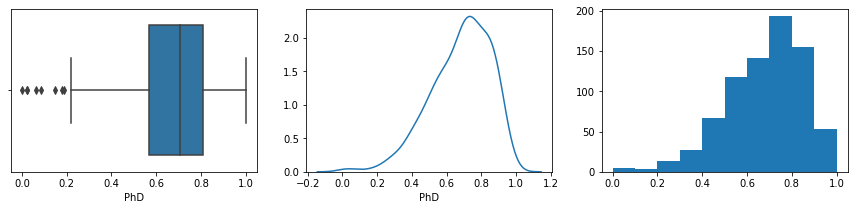

Column PhD is not normally distributed

 12. Original dataset: Univariate analysis for PhD 

Mean is 72.660232, Median is 75.000000, Modes are [26]
Column PhD has outliers


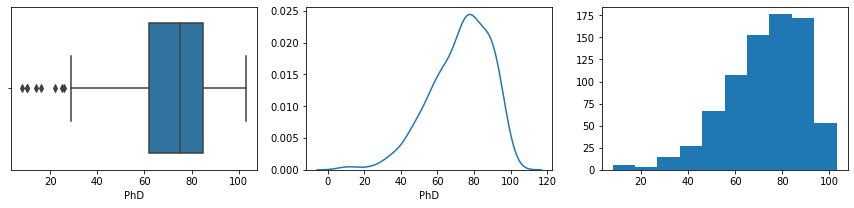

Column PhD is not normally distributed

 13. Univariate analysis for Terminal 

Mean is 0.732930, Median is 0.763158, Modes are [30]
Column Terminal has outliers


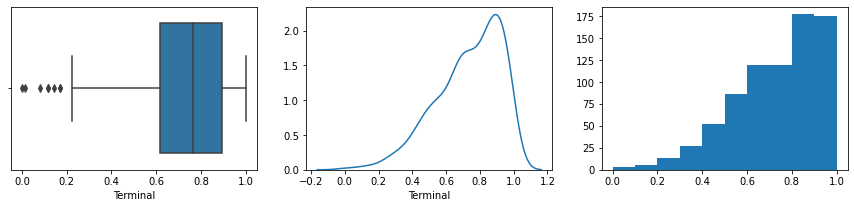

Column Terminal is not normally distributed

 13. Original dataset: Univariate analysis for Terminal 

Mean is 79.702703, Median is 82.000000, Modes are [30]
Column Terminal has outliers


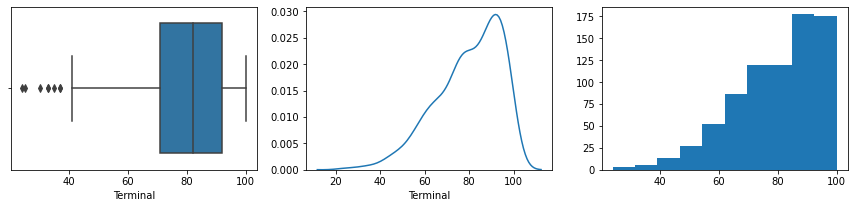

Column Terminal is not normally distributed

 14. Univariate analysis for S.F.Ratio 

Mean is 0.310716, Median is 0.297587, Modes are [15]
Column S.F.Ratio has outliers


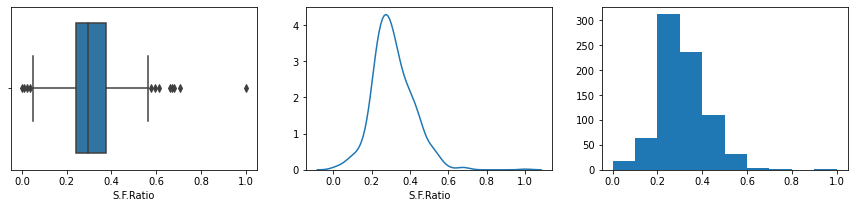

Column S.F.Ratio is not normally distributed

 14. Original dataset: Univariate analysis for S.F.Ratio 

Mean is 14.089704, Median is 13.600000, Modes are [15]
Column S.F.Ratio has outliers


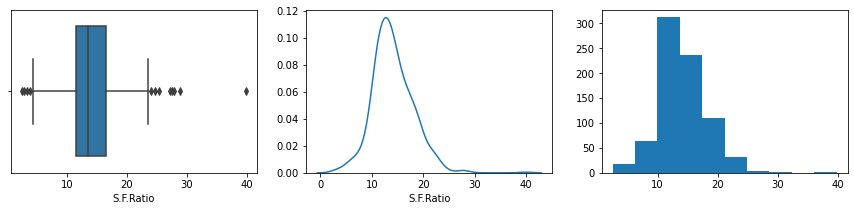

Column S.F.Ratio is not normally distributed

 15. Univariate analysis for perc.alumni 

Mean is 0.355373, Median is 0.328125, Modes are [32]
Column perc.alumni has outliers


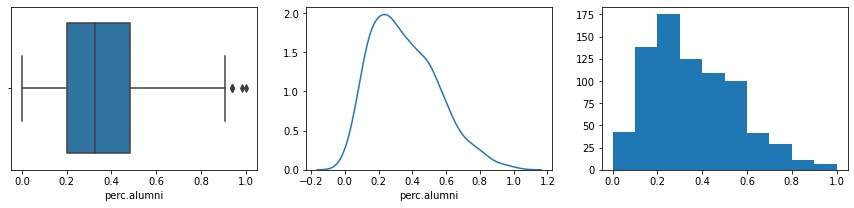

Column perc.alumni is not normally distributed

 15. Original dataset: Univariate analysis for perc.alumni 

Mean is 22.743887, Median is 21.000000, Modes are [32]
Column perc.alumni has outliers


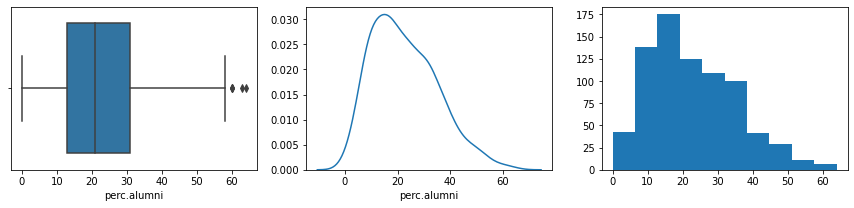

Column perc.alumni is not normally distributed

 16. Univariate analysis for Expend 

Mean is 0.122046, Median is 0.097857, Modes are [2]
Column Expend has outliers


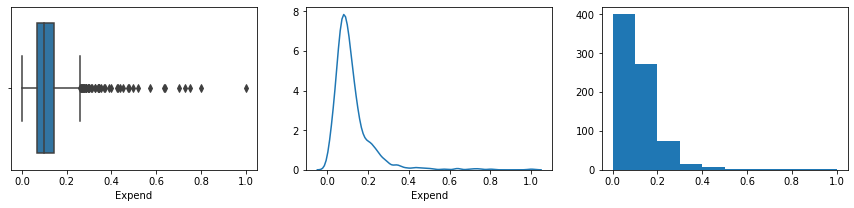

Column Expend is not normally distributed

 16. Original dataset: Univariate analysis for Expend 

Mean is 9660.171171, Median is 8377.000000, Modes are [2]
Column Expend has outliers


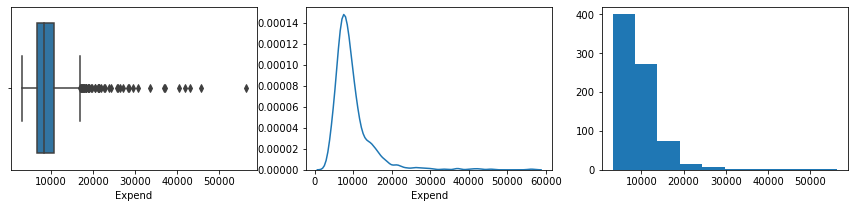

Column Expend is not normally distributed

 17. Univariate analysis for Grad.Rate 

Mean is 0.513549, Median is 0.509259, Modes are [24]
Column Grad.Rate has outliers


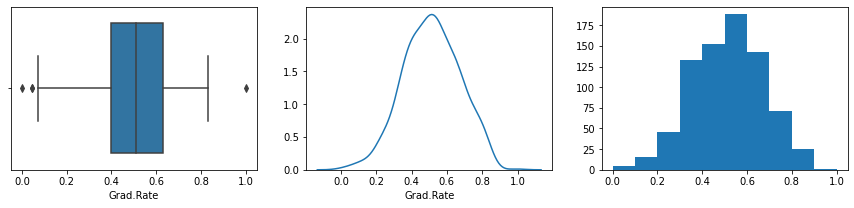

Column Grad.Rate is not normally distributed

 17. Original dataset: Univariate analysis for Grad.Rate 

Mean is 65.463320, Median is 65.000000, Modes are [24]
Column Grad.Rate has outliers


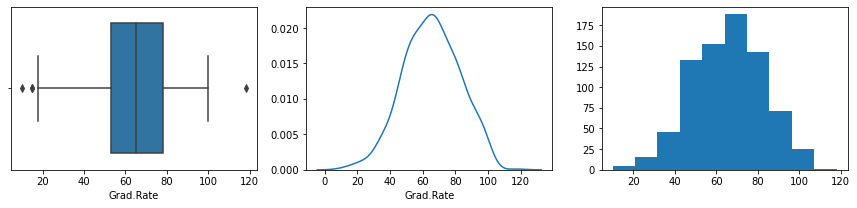

Column Grad.Rate is not normally distributed
There are 584 outliers across variables in the original unscaled dataset
There are 586 outliers across variables in the scaled dataset


In [35]:
#2.2
# B.Below is for minmax scaler(please this is not yet a recommended scaling option and this is just a test to showcase)
from sklearn.preprocessing import MinMaxScaler
df_new=df_edu.copy()
df_new.drop(columns='Names',inplace=True)
minmaxscaler =  MinMaxScaler()
for i in df_new.columns:
    df_new[i]= minmaxscaler.fit_transform(df_edu[[i]]) 
print('B.Univariate analysis after normalizing the original dataset')
print('----------------------------------------------------------')
# Find the interquartile range for this scaled data set
univariate_analysis(df_new,1)
Q1 = df_new.quantile(0.25)
Q3 = df_new.quantile(0.75)
IQR = Q3 - Q1
print('There are %d outliers across variables in the original unscaled dataset' %(len(np.where(df_edu > Q3_original + (1.5 * IQR_original))[0])+len( np.where(df_edu < Q1_original - (1.5 * IQR_original))[0])))
print('There are %d outliers across variables in the scaled dataset' %(len(np.where(df_new > Q3 + (1.5 * IQR))[0])+len( np.where(df_new < Q1 - (1.5 * IQR))[0])))

C.Univariate analysis after logarithmic scaling of the original dataset
---------------------------------------------------------------------

 1. Univariate analysis for Apps 

Mean is 7.427593, Median is 7.351800, Modes are [3]
Column Apps has outliers


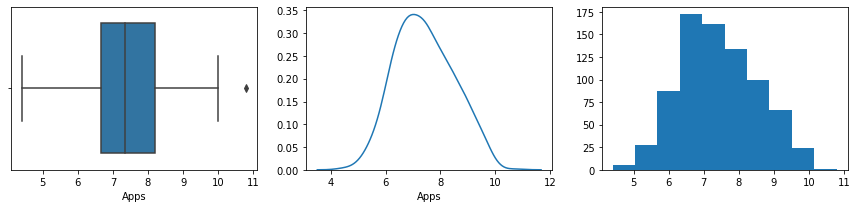

Column Apps is not normally distributed

 1. Original dataset: Univariate analysis for Apps 

Mean is 3001.638353, Median is 1558.000000, Modes are [3]
Column Apps has outliers


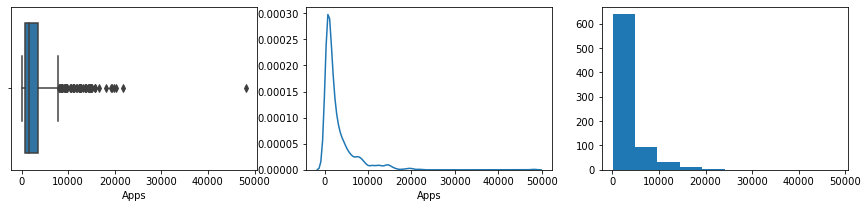

Column Apps is not normally distributed

 2. Univariate analysis for Accept 

Mean is 7.110960, Median is 7.013016, Modes are [4]
Column Accept has outliers


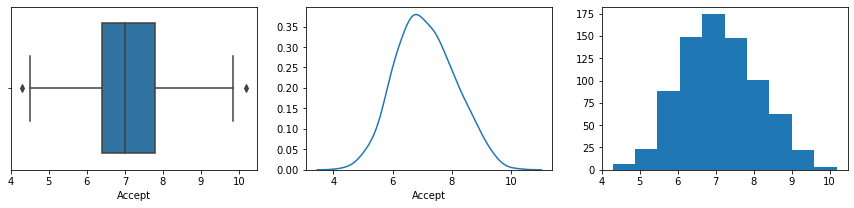

Column Accept is not normally distributed

 2. Original dataset: Univariate analysis for Accept 

Mean is 2018.804376, Median is 1110.000000, Modes are [4]
Column Accept has outliers


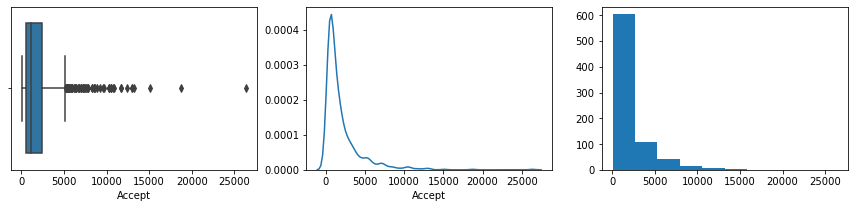

Column Accept is not normally distributed

 3. Univariate analysis for Enroll 

Mean is 6.176126, Median is 6.075346, Modes are [5]
Column Enroll does not have outliers


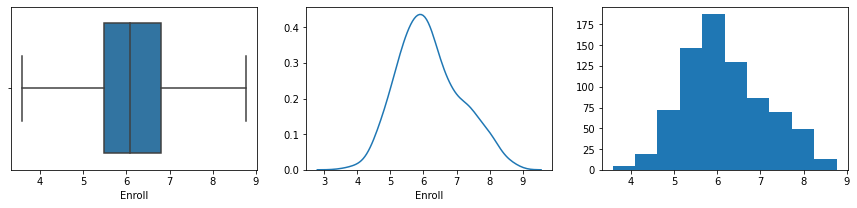

Column Enroll is not normally distributed

 3. Original dataset: Univariate analysis for Enroll 

Mean is 779.972973, Median is 434.000000, Modes are [5]
Column Enroll has outliers


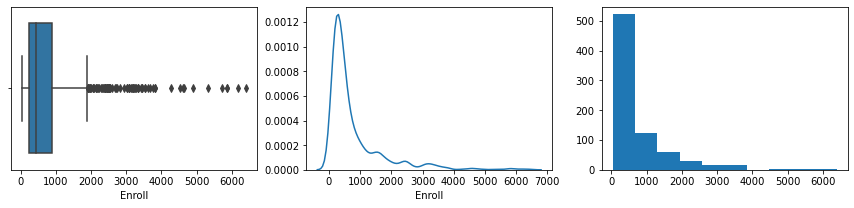

Column Enroll is not normally distributed

 4. Univariate analysis for Top10perc 

Mean is 3.169247, Median is 3.178054, Modes are [37]
Column Top10perc has outliers


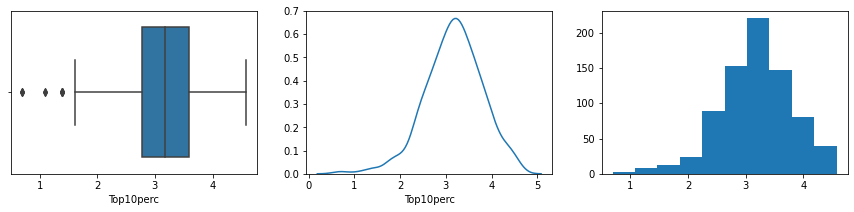

Column Top10perc is not normally distributed

 4. Original dataset: Univariate analysis for Top10perc 

Mean is 27.558559, Median is 23.000000, Modes are [37]
Column Top10perc has outliers


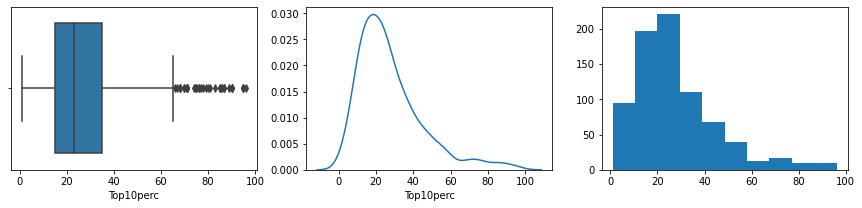

Column Top10perc is not normally distributed

 5. Univariate analysis for Top25perc 

Mean is 3.972021, Median is 4.007333, Modes are [20]
Column Top25perc has outliers


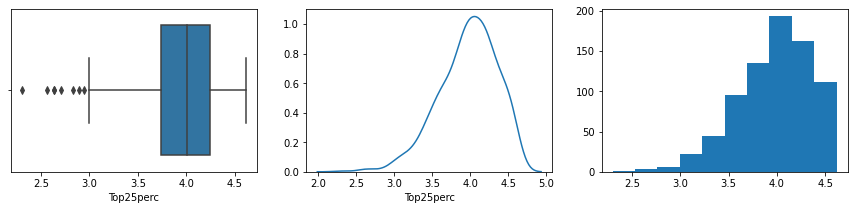

Column Top25perc is not normally distributed

 5. Original dataset: Univariate analysis for Top25perc 

Mean is 55.796654, Median is 54.000000, Modes are [20]
Column Top25perc does not have outliers


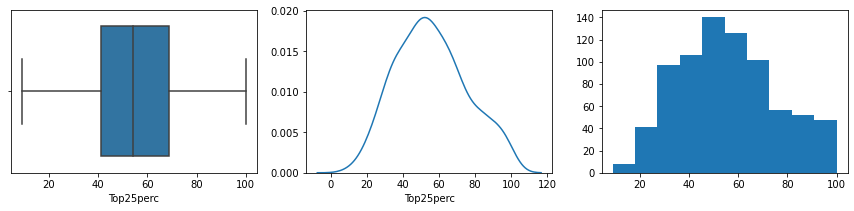

Column Top25perc is not normally distributed

 6. Univariate analysis for F.Undergrad 

Mean is 7.635932, Median is 7.443078, Modes are [3]
Column F.Undergrad does not have outliers


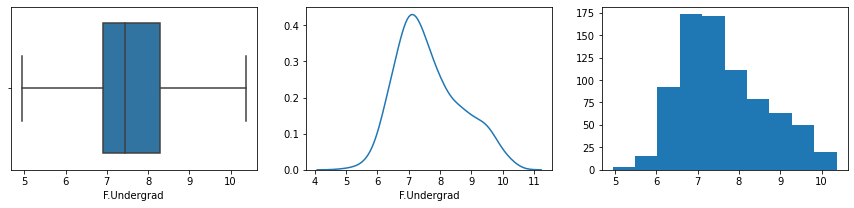

Column F.Undergrad is not normally distributed

 6. Original dataset: Univariate analysis for F.Undergrad 

Mean is 3699.907336, Median is 1707.000000, Modes are [3]
Column F.Undergrad has outliers


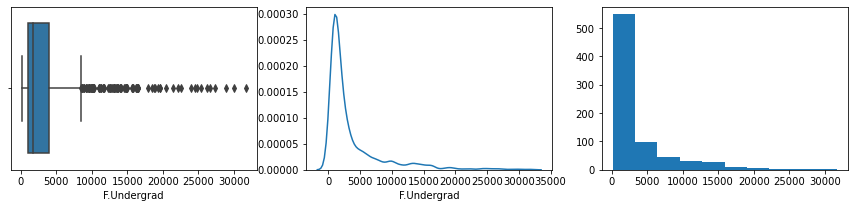

Column F.Undergrad is not normally distributed

 7. Univariate analysis for P.Undergrad 

Mean is 5.706966, Median is 5.869297, Modes are [7]
Column P.Undergrad has outliers


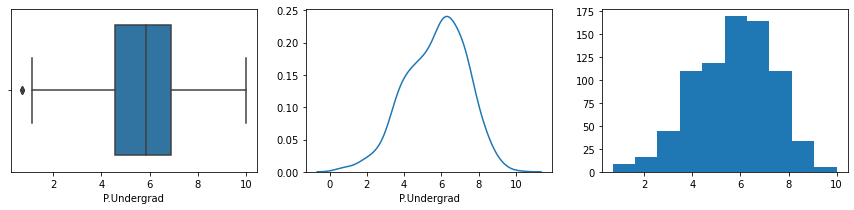

Column P.Undergrad is not normally distributed

 7. Original dataset: Univariate analysis for P.Undergrad 

Mean is 855.298584, Median is 353.000000, Modes are [7]
Column P.Undergrad has outliers


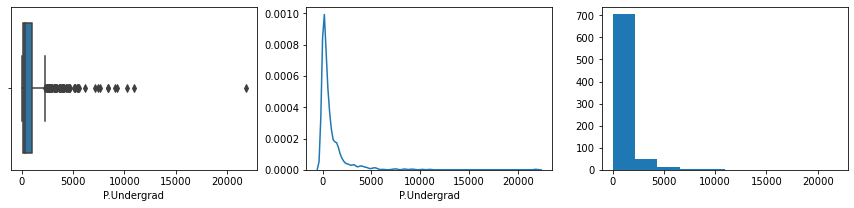

Column P.Undergrad is not normally distributed

 8. Univariate analysis for Outstate 

Mean is 9.175706, Median is 9.209440, Modes are [13]
Column Outstate has outliers


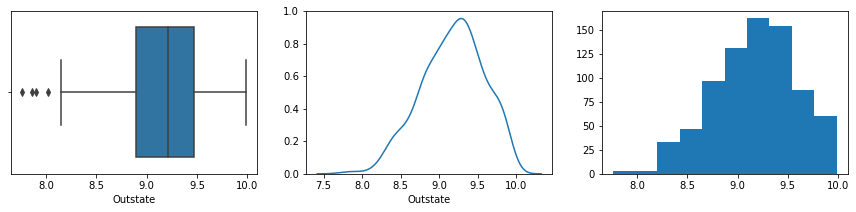

Column Outstate is not normally distributed

 8. Original dataset: Univariate analysis for Outstate 

Mean is 10440.669241, Median is 9990.000000, Modes are [13]
Column Outstate has outliers


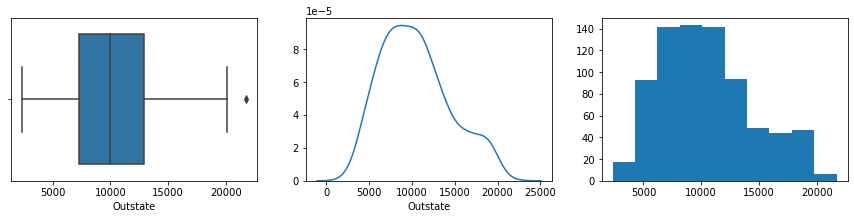

Column Outstate is not normally distributed

 9. Univariate analysis for Room.Board 

Mean is 8.348207, Median is 8.343078, Modes are [9]
Column Room.Board has outliers


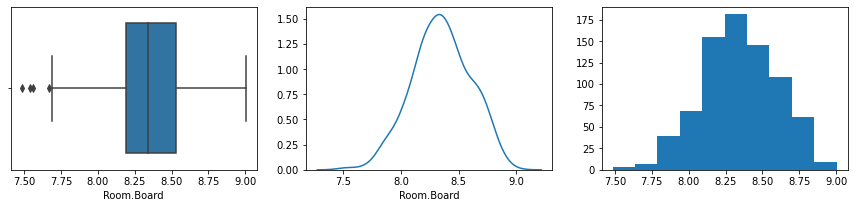

Column Room.Board is not normally distributed

 9. Original dataset: Univariate analysis for Room.Board 

Mean is 4357.526384, Median is 4200.000000, Modes are [9]
Column Room.Board has outliers


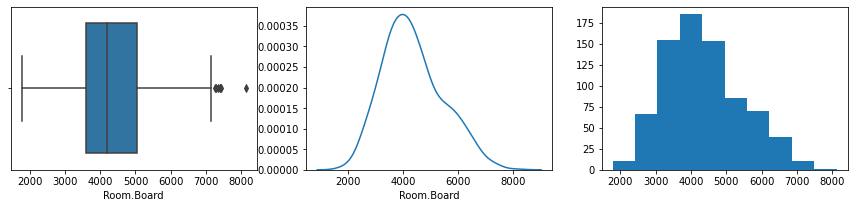

Column Room.Board is not normally distributed

 10. Univariate analysis for Books 

Mean is 6.273912, Median is 6.216606, Modes are [178]
Column Books has outliers


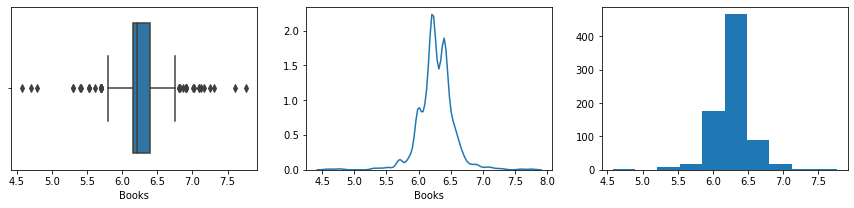

Column Books is not normally distributed

 10. Original dataset: Univariate analysis for Books 

Mean is 549.380952, Median is 500.000000, Modes are [178]
Column Books has outliers


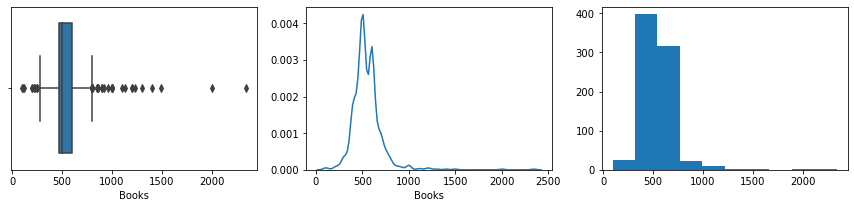

Column Books is not normally distributed

 11. Univariate analysis for Personal 

Mean is 7.086012, Median is 7.090910, Modes are [45]
Column Personal has outliers


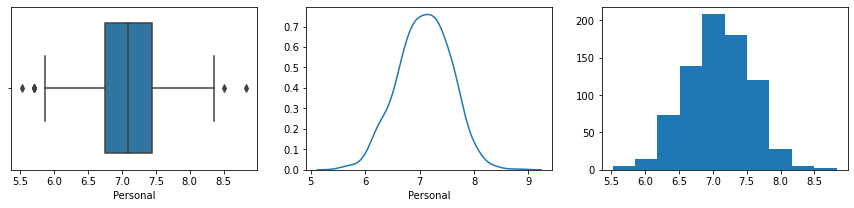

Column Personal is normally distributed

 11. Original dataset: Univariate analysis for Personal 

Mean is 1340.642214, Median is 1200.000000, Modes are [45]
Column Personal has outliers


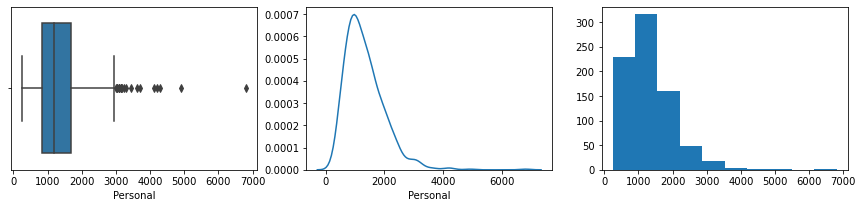

Column Personal is not normally distributed

 12. Univariate analysis for PhD 

Mean is 4.267357, Median is 4.330733, Modes are [26]
Column PhD has outliers


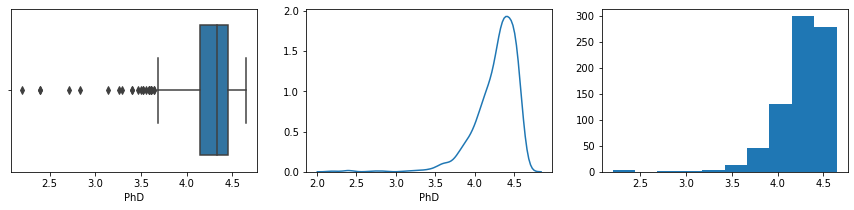

Column PhD is not normally distributed

 12. Original dataset: Univariate analysis for PhD 

Mean is 72.660232, Median is 75.000000, Modes are [26]
Column PhD has outliers


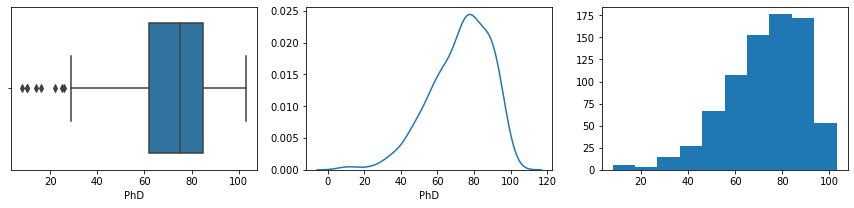

Column PhD is not normally distributed

 13. Univariate analysis for Terminal 

Mean is 4.371075, Median is 4.418841, Modes are [30]
Column Terminal has outliers


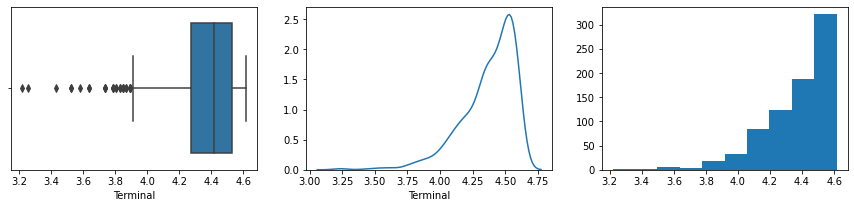

Column Terminal is not normally distributed

 13. Original dataset: Univariate analysis for Terminal 

Mean is 79.702703, Median is 82.000000, Modes are [30]
Column Terminal has outliers


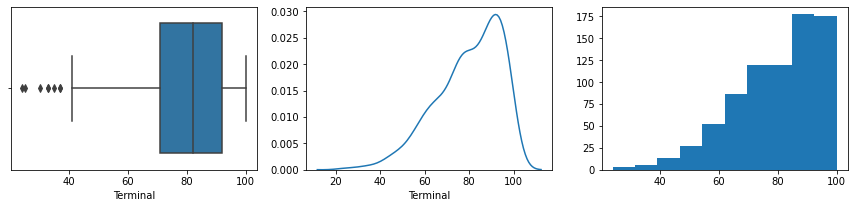

Column Terminal is not normally distributed

 14. Univariate analysis for S.F.Ratio 

Mean is 2.678210, Median is 2.681022, Modes are [15]
Column S.F.Ratio has outliers


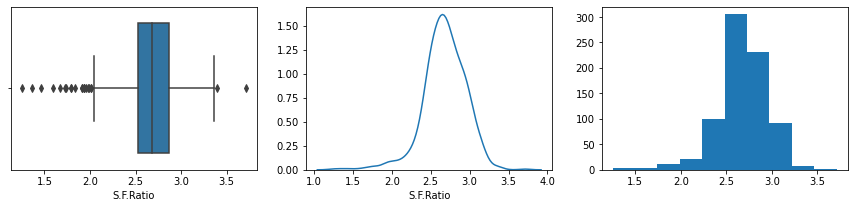

Column S.F.Ratio is not normally distributed

 14. Original dataset: Univariate analysis for S.F.Ratio 

Mean is 14.089704, Median is 13.600000, Modes are [15]
Column S.F.Ratio has outliers


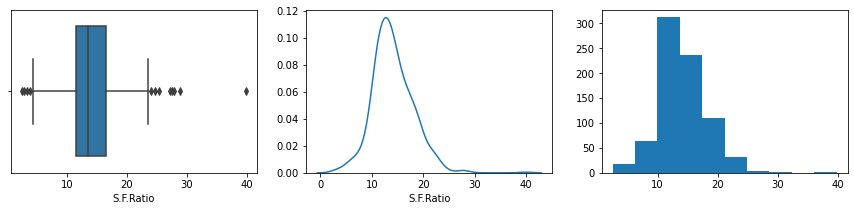

Column S.F.Ratio is not normally distributed

 15. Univariate analysis for perc.alumni 

Mean is 3.007372, Median is 3.091042, Modes are [32]
Column perc.alumni has outliers


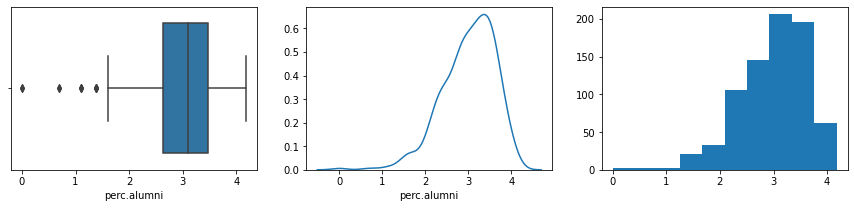

Column perc.alumni is not normally distributed

 15. Original dataset: Univariate analysis for perc.alumni 

Mean is 22.743887, Median is 21.000000, Modes are [32]
Column perc.alumni has outliers


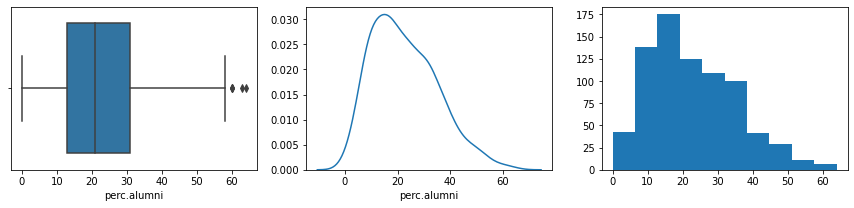

Column perc.alumni is not normally distributed

 16. Univariate analysis for Expend 

Mean is 9.080763, Median is 9.033365, Modes are [2]
Column Expend has outliers


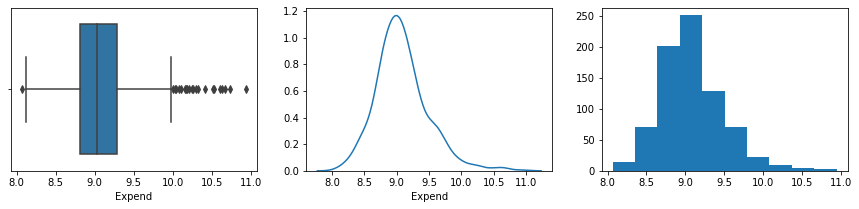

Column Expend is not normally distributed

 16. Original dataset: Univariate analysis for Expend 

Mean is 9660.171171, Median is 8377.000000, Modes are [2]
Column Expend has outliers


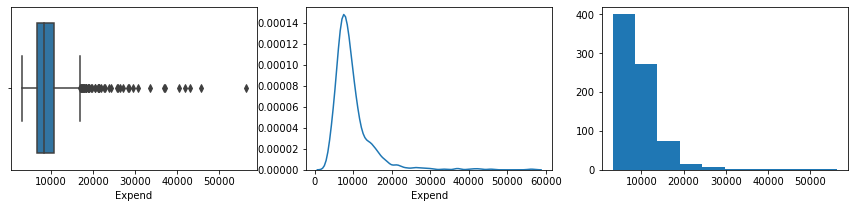

Column Expend is not normally distributed

 17. Univariate analysis for Grad.Rate 

Mean is 4.158004, Median is 4.189655, Modes are [24]
Column Grad.Rate has outliers


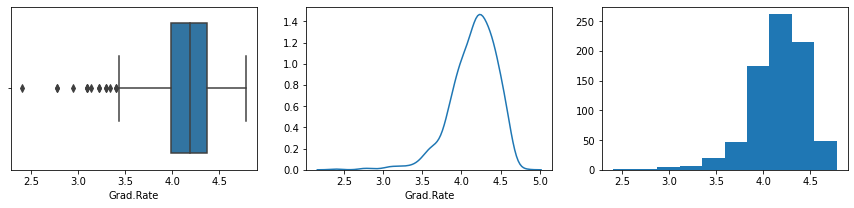

Column Grad.Rate is not normally distributed

 17. Original dataset: Univariate analysis for Grad.Rate 

Mean is 65.463320, Median is 65.000000, Modes are [24]
Column Grad.Rate has outliers


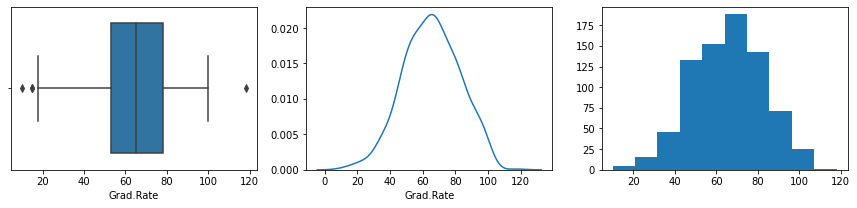

Column Grad.Rate is not normally distributed
There are 584 outliers across variables in the original unscaled dataset
There are 210 outliers across variables in the scaled dataset


In [36]:
#2.2 
# C.Below is for logarithmic scaling
from sklearn.preprocessing import FunctionTransformer   
log_transformer = FunctionTransformer(np.log1p)
df_new=df_edu.copy()
df_new.drop(columns='Names',inplace=True)
for i in df_new.columns:
    df_new[i]= log_transformer.fit_transform(df_edu[[i]]) 
print('C.Univariate analysis after logarithmic scaling of the original dataset')
print('---------------------------------------------------------------------')
# Find the interquartile range for this scaled data set
univariate_analysis(df_new,1)
Q1 = df_new.quantile(0.25)
Q3 = df_new.quantile(0.75)
IQR = Q3 - Q1
print('There are %d outliers across variables in the original unscaled dataset' %(len(np.where(df_edu > Q3_original + (1.5 * IQR_original))[0])+len( np.where(df_edu < Q1_original - (1.5 * IQR_original))[0])))
print('There are %d outliers across variables in the scaled dataset' %(len(np.where(df_new > Q3 + (1.5 * IQR))[0])+len( np.where(df_new < Q1 - (1.5 * IQR))[0])))

In [181]:
#2.2
# Inference based on observations for scaling
# Scaling options considered: Standardization, Normalization and Logarithmic transformation
# Observations:
#    1. Given the significant outliers in the original data continues to be retained post to the scaling using Minmaxscaler and 
#  standardscaler these methods does not seem to scale the dimension efficiently. 
#    2. Logarithmic scaler results in improved distribution of the dataset along with outliers ending up getting scaled within 
#  either side of the whiskers for the good part of it.
# Scaling option finalized accordingly will be logarithmic transformation.

In [ ]:
#2.3
# Comparison between Covariance and Correlation:
#  1.Covariance is the variance measured among the dimension which denots the direction of relationship between two independent 
# variables.Covariance expresses a dimensions variance with itself as well as with other dimensions in the form of matrix. However
# when it comes to Corelation apart from just the direction of relationship it also denotes the measure of strength of relationship between two independent variables.
#  2.Covariance are influenced by unit of variables in the original dataset  while corelation which is derived by dividing product 
# of variance between two independent variables with product of their standard deviation has values standardized between -1 and 
# +1 which will be its range. 
#  3.Hence coreleation is a unit free standardized measure with a known range of values while covariance can range between infinite
# values on either side of zero.
#  4.Due to robustness of Corelation measure between two variables it is more preferred than covariance for analysis.
#  5.On the other hand, covariance matrix of standardized variable is actually a correlation matrix
#  6.The sign of elements of covariance matrix and the equivalent corelation matrix is identical.Correlation is a function of the covariance. 

In [191]:
#2.4

# Inferences on outliers post the scaling of the dataset
# 1. Variables other than Books, Expend, Top25perc, Top10perc, PhD, Terminal and S.F.Ration are significantly treated for their outliers automatically post scaling.
# 2. Out of those variables Enroll and F.Undergrad are completely treated for outliers.
# 3. Few observations on those variables that still retain outliers or introduced new outliers as below.
# 		Books, Expend, continue to have good number of outliers despite scaling however they are equally spread across either side of whiskers compared just right side of the whisker in the original dataset.
# 		Top25perc has introduced new outliers while original dataset did not have any outliers
# 		Top10perc, P.Undergrad, Outstate, Room.Board, perc.alumni had outliers beyond maximum whisker in the original dataset. While scaled dataset does not have any of those outliers it has introduced few outliers to the left of minimum whisker.
# 		Personal variable got most of its outlier right of whisker fixed but couple of outliers introduced to the left of whisker.
# 		PhD, Terminal, S.F.Ratio and Grad.Rate ended up with more outliers to the left of whisker than the original dataset.
# 4. Personal variable is normally distributed post scaling while it was not with the original dataset.





 1. Univariate analysis for Apps 

Mean is 7.420076, Median is 7.351158, Modes are [3]
Column Apps does not have outliers


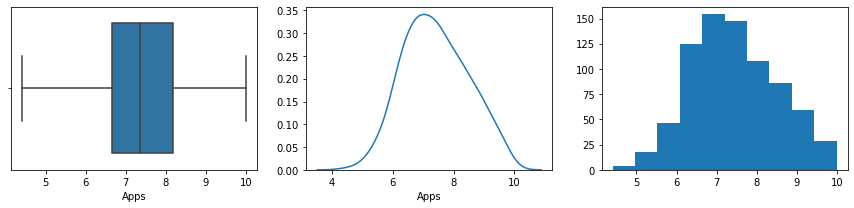

Column Apps is not normally distributed

 1. Original dataset: Univariate analysis for Apps 

Mean is 3001.638353, Median is 1558.000000, Modes are [3]
Column Apps has outliers


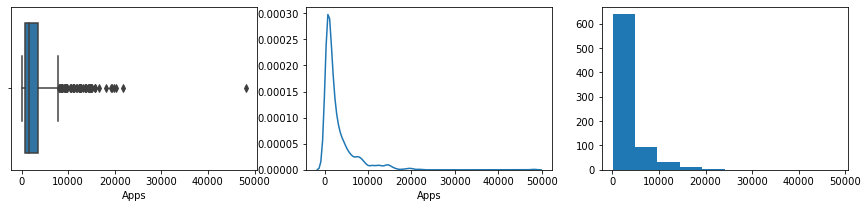

Column Apps is not normally distributed

 2. Univariate analysis for Accept 

Mean is 7.111451, Median is 7.013016, Modes are [4]
Column Accept has outliers


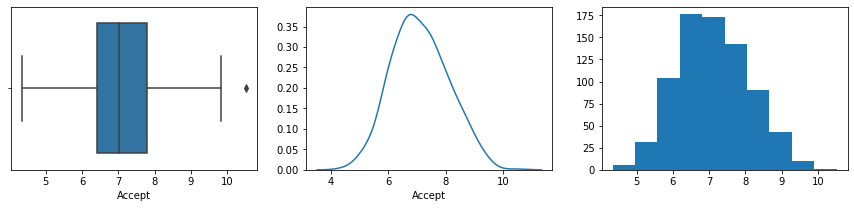

Column Accept is not normally distributed

 2. Original dataset: Univariate analysis for Accept 

Mean is 2018.804376, Median is 1110.000000, Modes are [4]
Column Accept has outliers


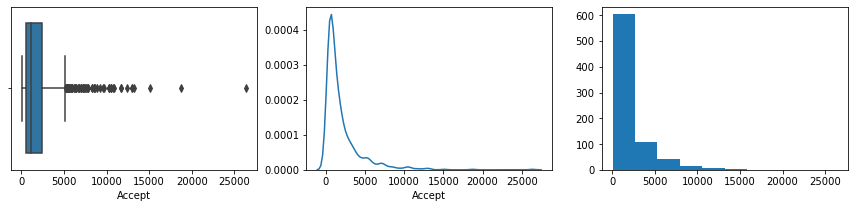

Column Accept is not normally distributed

 3. Univariate analysis for Enroll 

Mean is 6.176126, Median is 6.075346, Modes are [5]
Column Enroll does not have outliers


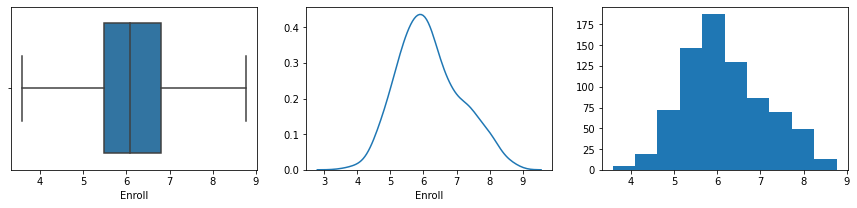

Column Enroll is not normally distributed

 3. Original dataset: Univariate analysis for Enroll 

Mean is 779.972973, Median is 434.000000, Modes are [5]
Column Enroll has outliers


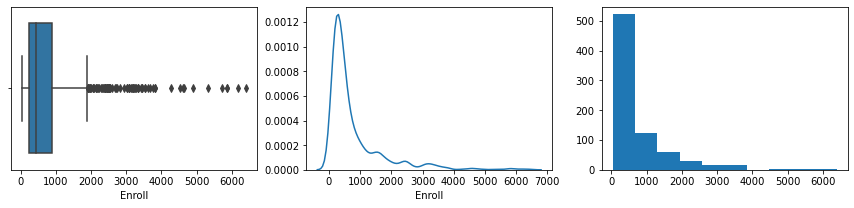

Column Enroll is not normally distributed

 4. Univariate analysis for Top10perc 

Mean is 3.202929, Median is 3.218876, Modes are [37]
Column Top10perc has outliers


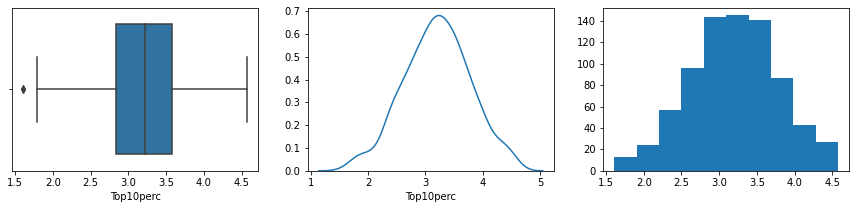

Column Top10perc is not normally distributed

 4. Original dataset: Univariate analysis for Top10perc 

Mean is 27.558559, Median is 23.000000, Modes are [37]
Column Top10perc has outliers


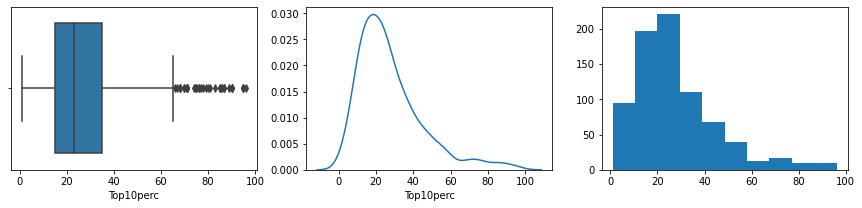

Column Top10perc is not normally distributed

 5. Univariate analysis for Top25perc 

Mean is 3.960345, Median is 4.007333, Modes are [20]
Column Top25perc has outliers


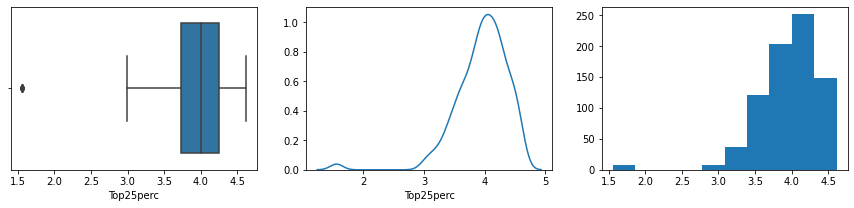

Column Top25perc is not normally distributed

 5. Original dataset: Univariate analysis for Top25perc 

Mean is 55.796654, Median is 54.000000, Modes are [20]
Column Top25perc does not have outliers


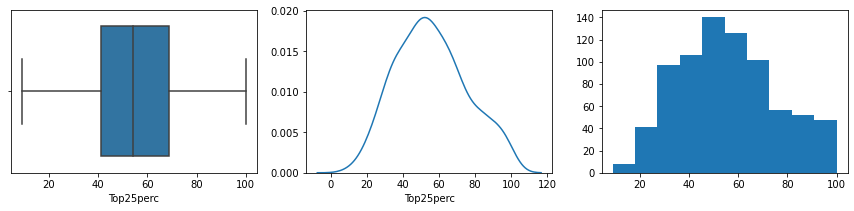

Column Top25perc is not normally distributed

 6. Univariate analysis for F.Undergrad 

Mean is 7.635932, Median is 7.443078, Modes are [3]
Column F.Undergrad does not have outliers


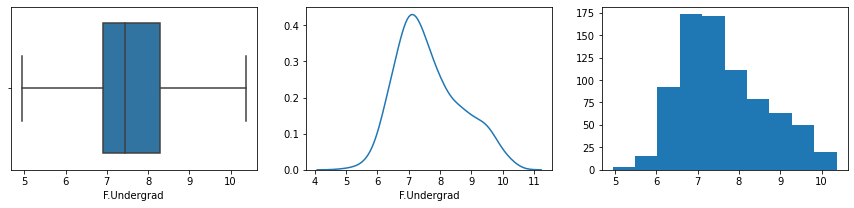

Column F.Undergrad is not normally distributed

 6. Original dataset: Univariate analysis for F.Undergrad 

Mean is 3699.907336, Median is 1707.000000, Modes are [3]
Column F.Undergrad has outliers


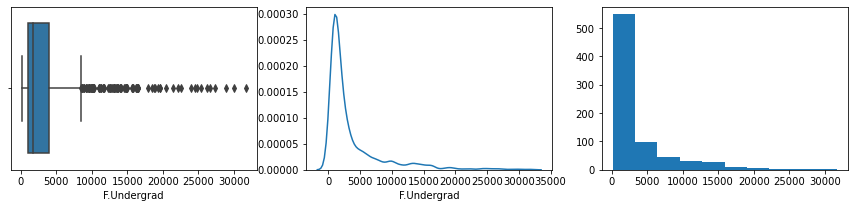

Column F.Undergrad is not normally distributed

 7. Univariate analysis for P.Undergrad 

Mean is 5.728152, Median is 5.869297, Modes are [7]
Column P.Undergrad has outliers


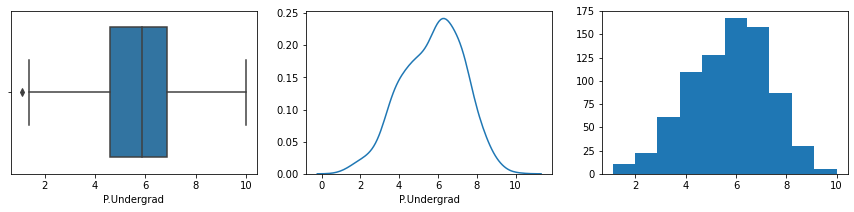

Column P.Undergrad is not normally distributed

 7. Original dataset: Univariate analysis for P.Undergrad 

Mean is 855.298584, Median is 353.000000, Modes are [7]
Column P.Undergrad has outliers


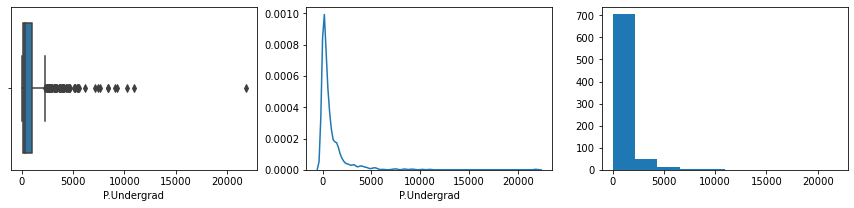

Column P.Undergrad is not normally distributed

 8. Univariate analysis for Outstate 

Mean is 9.140772, Median is 9.209440, Modes are [13]
Column Outstate has outliers


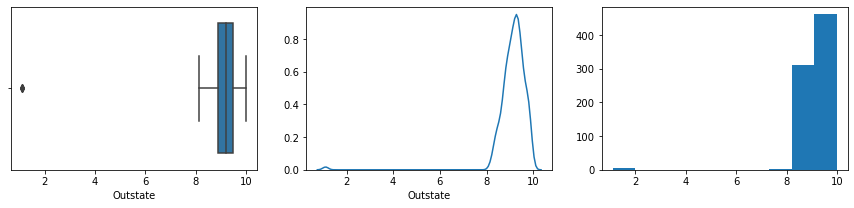

Column Outstate is not normally distributed

 8. Original dataset: Univariate analysis for Outstate 

Mean is 10440.669241, Median is 9990.000000, Modes are [13]
Column Outstate has outliers


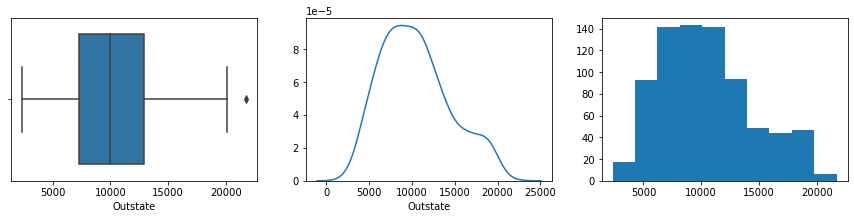

Column Outstate is not normally distributed

 9. Univariate analysis for Room.Board 

Mean is 8.350686, Median is 8.343078, Modes are [9]
Column Room.Board does not have outliers


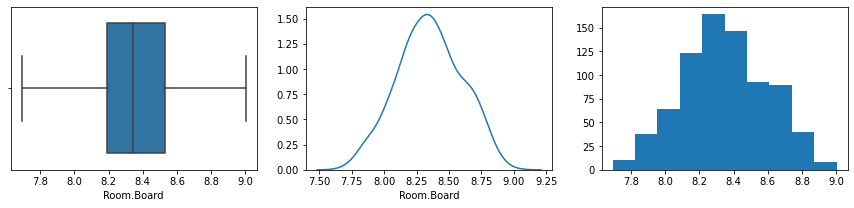

Column Room.Board is not normally distributed

 9. Original dataset: Univariate analysis for Room.Board 

Mean is 4357.526384, Median is 4200.000000, Modes are [9]
Column Room.Board has outliers


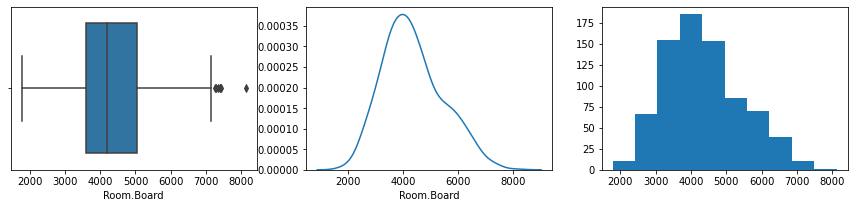

Column Room.Board is not normally distributed

 10. Univariate analysis for Books 

Mean is 6.441340, Median is 6.284134, Modes are [178]
Column Books has outliers


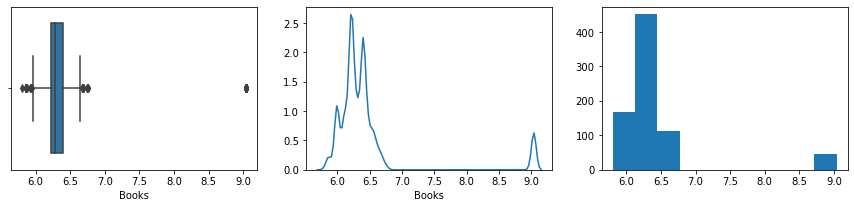

Column Books is not normally distributed

 10. Original dataset: Univariate analysis for Books 

Mean is 549.380952, Median is 500.000000, Modes are [178]
Column Books has outliers


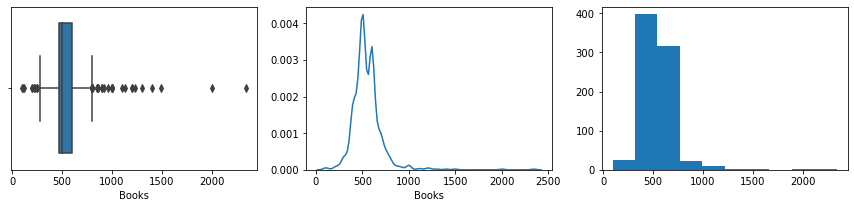

Column Books is not normally distributed

 11. Univariate analysis for Personal 

Mean is 7.081889, Median is 7.090910, Modes are [45]
Column Personal does not have outliers


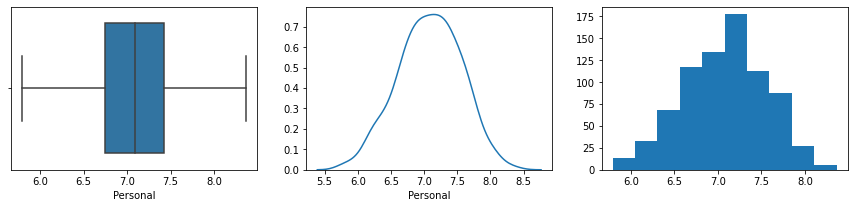

Column Personal is not normally distributed

 11. Original dataset: Univariate analysis for Personal 

Mean is 1340.642214, Median is 1200.000000, Modes are [45]
Column Personal has outliers


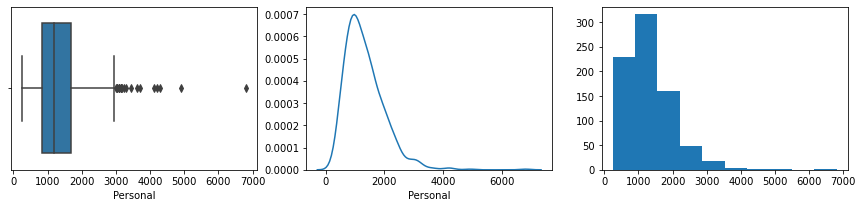

Column Personal is not normally distributed

 12. Univariate analysis for PhD 

Mean is 4.427462, Median is 4.343805, Modes are [26]
Column PhD has outliers


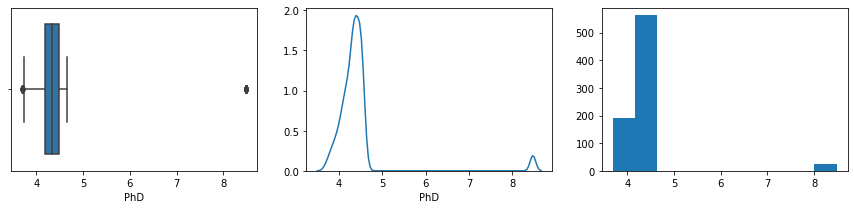

Column PhD is not normally distributed

 12. Original dataset: Univariate analysis for PhD 

Mean is 72.660232, Median is 75.000000, Modes are [26]
Column PhD has outliers


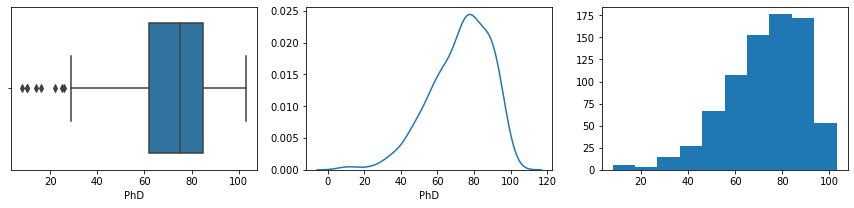

Column PhD is not normally distributed

 13. Univariate analysis for Terminal 

Mean is 4.369178, Median is 4.418841, Modes are [30]
Column Terminal has outliers


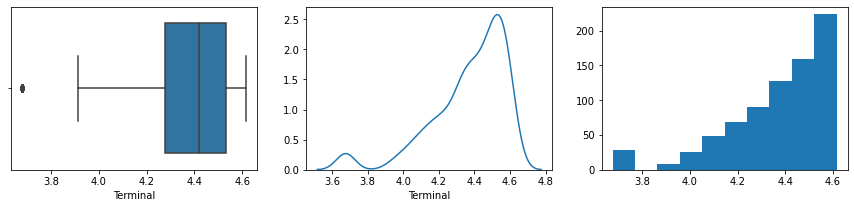

Column Terminal is not normally distributed

 13. Original dataset: Univariate analysis for Terminal 

Mean is 79.702703, Median is 82.000000, Modes are [30]
Column Terminal has outliers


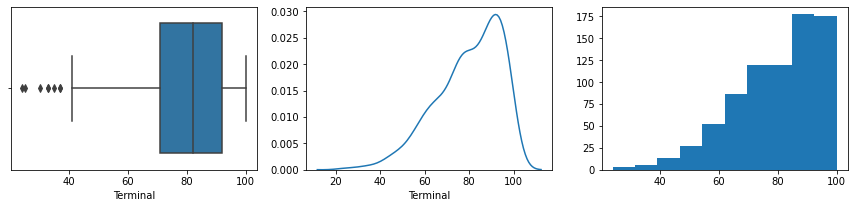

Column Terminal is not normally distributed

 14. Univariate analysis for S.F.Ratio 

Mean is 2.762204, Median is 2.701361, Modes are [22]
Column S.F.Ratio has outliers


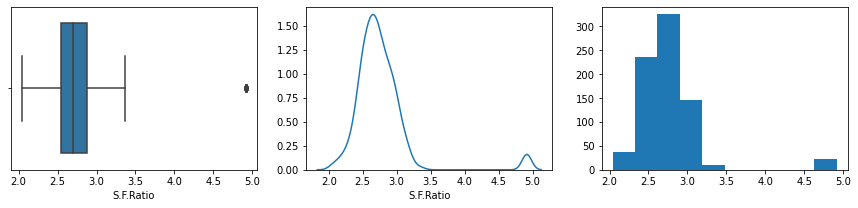

Column S.F.Ratio is not normally distributed

 14. Original dataset: Univariate analysis for S.F.Ratio 

Mean is 14.089704, Median is 13.600000, Modes are [15]
Column S.F.Ratio has outliers


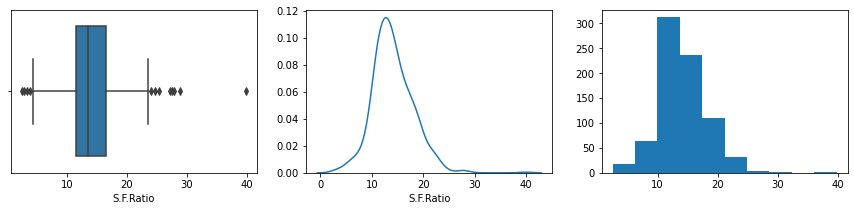

Column S.F.Ratio is not normally distributed

 15. Univariate analysis for perc.alumni 

Mean is 3.023637, Median is 3.091042, Modes are [32]
Column perc.alumni does not have outliers


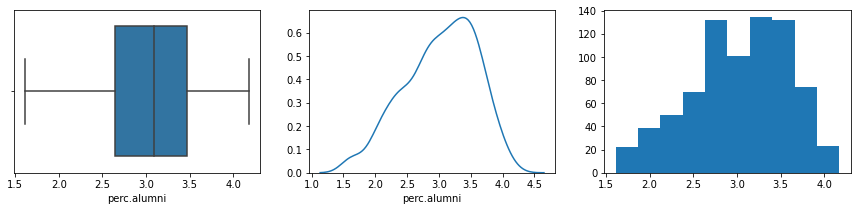

Column perc.alumni is not normally distributed

 15. Original dataset: Univariate analysis for perc.alumni 

Mean is 22.743887, Median is 21.000000, Modes are [32]
Column perc.alumni has outliers


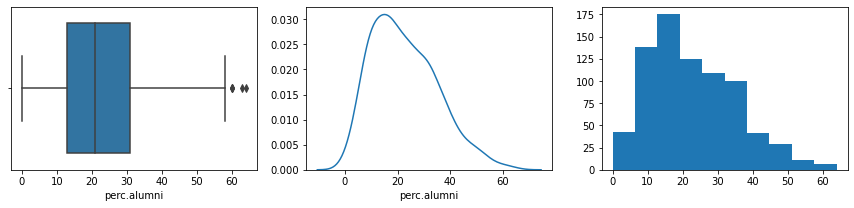

Column perc.alumni is not normally distributed

 16. Univariate analysis for Expend 

Mean is 8.919903, Median is 9.004054, Modes are [21]
Column Expend has outliers


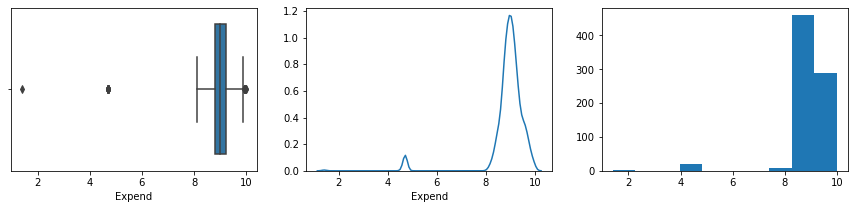

Column Expend is not normally distributed

 16. Original dataset: Univariate analysis for Expend 

Mean is 9660.171171, Median is 8377.000000, Modes are [2]
Column Expend has outliers


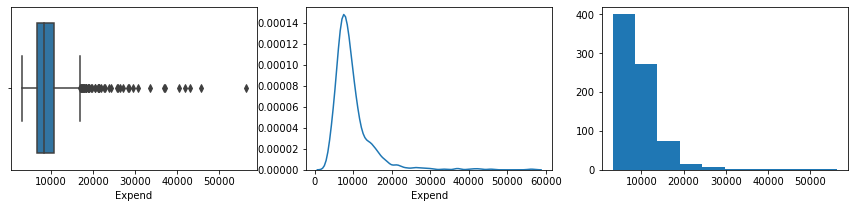

Column Expend is not normally distributed

 17. Univariate analysis for Grad.Rate 

Mean is 4.291241, Median is 4.204693, Modes are [24]
Column Grad.Rate has outliers


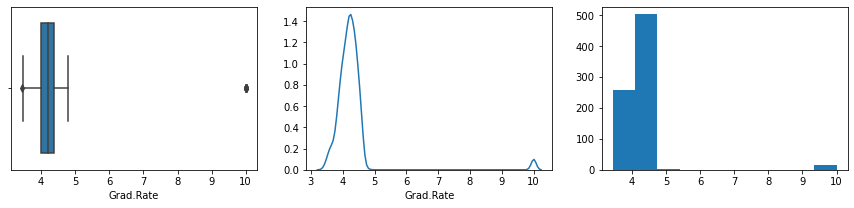

Column Grad.Rate is not normally distributed

 17. Original dataset: Univariate analysis for Grad.Rate 

Mean is 65.463320, Median is 65.000000, Modes are [24]
Column Grad.Rate has outliers


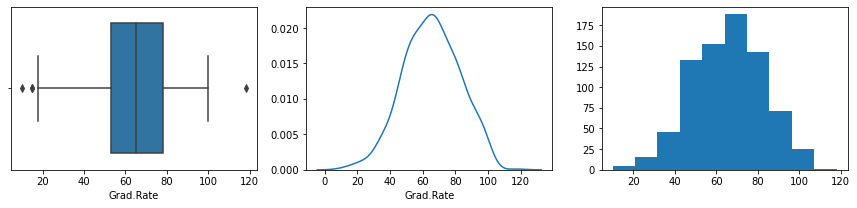

Column Grad.Rate is not normally distributed


In [37]:
#2.5
# In order to build effective and unbiased covariance matrix the remaining outliers shall be imputed. 
# Since almost 64% of the outliers has been fixed post scaling it has limited impact to information due to imputing by that much 
# as the scaled dataset will retain good amount of original information post outlier treatment but will enable better
# decomposition of its derived covariance matrix into eigen vectors (signal/direction of variance) and eigen_values
# Outlier treatment done as below to set the outliers with value equal to minimum or maximum whisker value conditionally
# Outliers left of minimum whisker will be set to the minimum whisker value.
# Outliers right of maximum whisker will be set to the maximum whisker value.
df_edu_outliers_treated = df_new.copy()
Q1 = df_edu_outliers_treated.quantile(0.25)
Q3 = df_edu_outliers_treated.quantile(0.75)
IQR = Q3 - Q1
whisker_left  = Q1 - 1.5 * IQR
whisker_right  = Q3 + 1.5 * IQR

# Replace outlier below the minimum whisker with the minimum whisker
for i, j in zip(np.where(df_edu_outliers_treated < Q1 - 1.5 * IQR)[0], np.where(df_edu_outliers_treated < Q1 - 1.5 * IQR)[1]): 
    df_edu_outliers_treated.iloc[i,j] = whisker_left[j-1]

# Replace outlier below the maximum whisker with the maximum whisker
whisker_right  = Q3 + 1.5 * IQR   
for i, j in zip(np.where(df_edu_outliers_treated >whisker_right)[0], np.where(df_edu_outliers_treated > whisker_right)[1]):
    df_edu_outliers_treated.iloc[i,j] = whisker_right[j-1]

# Print comparison of univariate analysis between outlier treated dataset and original dataset
univariate_analysis(df_edu_outliers_treated,1)

In [40]:
df_edu_outliers_treated.describe()

Apps      Accept      Enroll   Top10perc   Top25perc  \
count  777.000000  777.000000  777.000000  777.000000  777.000000   
mean     7.420076    7.111451    6.176126    3.202929    3.960345   
std      1.069701    0.990119    0.951072    0.579136    0.435236   
min      4.406719    4.345187    3.583519    1.609438    1.556193   
25%      6.655440    6.405228    5.493061    2.833213    3.737670   
50%      7.351158    7.013016    6.075346    3.218876    4.007333   
75%      8.187855    7.793587    6.805723    3.583519    4.248495   
max      9.989895   10.505863    8.762959    4.574711    4.615121   

       F.Undergrad  P.Undergrad    Outstate  Room.Board       Books  \
count   777.000000   777.000000  777.000000  777.000000  777.000000   
mean      7.635932     5.728152    9.140772    8.350686    6.441340   
std       1.026742     1.567511    0.700346    0.248143    0.675912   
min       4.941642     1.098612    1.098022    7.692113    5.802118   
25%       6.900731     4.605170    8.898502    8.188133    6.216606   
50%       7.443078     5.869297    9.209440    8.343078    6.284134   
75%       8.295549     6.875232    9.466996    8.527342    6.398595   
max      10.362304     9.991361    9.985114    9.002701    9.036154   

         Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count  777.000000  777.000000  777.000000  777.000000   777.000000   
mean     7.081889    4.427462    4.369178    2.762204     3.023637   
std      0.476531    0.751592    0.211833    0.432908     0.567357   
min      5.789253    3.688879    3.676316    2.041220     1.609438   
25%      6.746412    4.174387    4.276666    2.541602     2.639057   
50%      7.090910    4.343805    4.418841    2.701361     3.091042   
75%      7.427144    4.477337    4.532599    2.879198     3.465736   
max      8.363809    8.477811    4.615121    4.916500     4.174387   

           Expend   Grad.Rate  
count  777.000000  777.000000  
mean     8.919903    4.291241  
std      0.830049    0.839443  
min      1.399039    3.433987  
25%      8.792550    4.007333  
50%      9.004054    4.204693  
75%      9.240676    4.382027  
max      9.979059    9.999028

In [66]:
# Below code snippet gets the covariance and correlation for the scaled and outlier treated dataset to demonstrate
# comparison between covariance and corelation of this dataset. This demonstrates that the scaled datasets has its covariance
# and co relation almost on the similar scale.
df1=df_edu_outliers_treated.cov()
df2=df_edu_outliers_treated.corr()
df_cov_corr = pd.concat([df1, df2], axis=0)
df_cov_corr.reset_index().sort_values(by='index').head(15)

index      Apps    Accept    Enroll  Top10perc  Top25perc  \
1        Accept  1.010613  0.980336  0.892232   0.148803   0.120354   
18       Accept  0.954190  1.000000  0.947495   0.259504   0.279286   
0          Apps  1.144260  1.010613  0.927276   0.201222   0.151703   
17         Apps  1.000000  0.954190  0.911451   0.324812   0.325842   
26        Books  0.057628  0.045284  0.056035  -0.042583  -0.004290   
9         Books  0.041666  0.030305  0.036022  -0.016669  -0.001262   
2        Enroll  0.927276  0.892232  0.904538   0.119845   0.102568   
19       Enroll  0.911451  0.947495  1.000000   0.217584   0.247784   
32       Expend -0.106483 -0.055496 -0.105655  -0.012329   0.017035   
15       Expend -0.094547 -0.045609 -0.083408  -0.005927   0.006154   
22  F.Undergrad  0.873267  0.905479  0.961704   0.164077   0.223507   
5   F.Undergrad  0.959116  0.920508  0.939110   0.097564   0.099880   
16    Grad.Rate -0.007650 -0.027021 -0.025927   0.010450  -0.023582   
33    Grad.Rate -0.008519 -0.032511 -0.032474   0.021494  -0.064546   
24     Outstate  0.012759 -0.009890 -0.127134   0.308273   0.240303   

    F.Undergrad  P.Undergrad  Outstate  Room.Board     Books  Personal  \
1      0.920508     0.672204 -0.006858    0.032378  0.030305  0.100362   
18     0.905479     0.433115 -0.009890    0.131782  0.045284  0.212711   
0      0.959116     0.634605  0.009558    0.048842  0.041666  0.097709   
17     0.873267     0.378469  0.012759    0.184005  0.057628  0.191682   
26     0.067075     0.017015 -0.036262   -0.029457  1.000000  0.042243   
9      0.046549     0.018027 -0.017165   -0.004941  0.456857  0.013606   
2      0.939110     0.746615 -0.084682   -0.002483  0.036022  0.127907   
19     0.961704     0.500809 -0.127134   -0.010520  0.056035  0.282221   
32    -0.123690    -0.041871  0.065485    0.058602  0.029943 -0.054319   
15    -0.105414    -0.054479  0.038068    0.012070  0.016799 -0.021486   
22     1.000000     0.587786 -0.156563   -0.024421  0.067075  0.309550   
5      1.054200     0.946000 -0.112580   -0.006222  0.046549  0.151455   
16    -0.063663    -0.090083  0.030838    0.004208 -0.027814 -0.018593   
33    -0.073864    -0.068461  0.052455    0.020200 -0.049021 -0.046480   
24    -0.156563    -0.251597  1.000000    0.434593 -0.036262 -0.177136   

         PhD  Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
1  -0.000769  0.090076   0.106145    -0.056248 -0.045609  -0.027021  
18 -0.001034  0.429467   0.247637    -0.100130 -0.055496  -0.032511  
0   0.008037  0.102439   0.116492    -0.042080 -0.094547  -0.007650  
17  0.009996  0.452075   0.251558    -0.069336 -0.106483  -0.008519  
26  0.142453 -0.014188   0.009073    -0.096321  0.029943  -0.049021  
9   0.072368 -0.002031   0.002655    -0.036938  0.016799  -0.027814  
2  -0.005375  0.075547   0.111698    -0.091990 -0.083408  -0.025927  
19 -0.007519  0.374980   0.271292    -0.170480 -0.105655  -0.032474  
32  0.027396  0.064376  -0.500065     0.012763  1.000000  -0.021106  
15  0.017091  0.011319  -0.179691     0.006010  0.688981  -0.014706  
22 -0.010614  0.355982   0.282885    -0.240180 -0.123690  -0.073864  
5  -0.008190  0.077425   0.125738    -0.139912 -0.105414  -0.063663  
16  0.064813 -0.011537  -0.006706     0.010470 -0.014706   0.704664  
33  0.102728 -0.064878  -0.018453     0.021984 -0.021106   1.000000  
24  0.059446  0.175914  -0.107877     0.302118  0.065485   0.052455

In [162]:
eig_vecs

array([[-4.35748482e-01, -4.39771363e-01, -4.42742378e-01,
        -1.53181502e-01, -1.75065087e-01, -4.38826310e-01,
        -2.42239117e-01,  2.61764862e-02, -6.02407989e-02,
        -2.78879876e-02, -1.39590890e-01,  1.56994590e-02,
        -2.36795057e-01, -1.57860597e-01,  6.23355324e-02,
         6.80083304e-02,  3.18780070e-02],
       [-4.03364844e-02, -3.21520279e-03,  6.72421367e-02,
        -4.27673380e-01, -3.89705820e-01,  1.06366051e-01,
         3.02850148e-01, -3.39135301e-01, -3.37426857e-01,
         5.35469377e-02,  2.35308094e-01,  2.28897263e-02,
        -2.89779165e-01,  1.12474904e-01, -4.06670548e-01,
        -7.75821623e-02, -1.95137290e-02],
       [-2.83934370e-02, -7.03943912e-02, -4.81800486e-02,
         8.35205231e-02,  1.24575309e-02, -5.08358106e-02,
        -1.17403261e-01, -1.45497786e-02, -1.60873407e-02,
        -1.32100671e-01, -1.00622913e-01, -3.76567713e-02,
        -8.53482628e-02,  6.26315466e-01,  1.10257738e-01,
        -7.21243279e-01,  8.3

In [218]:
#2.7
#Now that the dataset is scaled and imputed for outliers we shall standardize it before generating covariance matrix for 
#further decomposition of the same into eigen vectors and eigen values.
#The extraction of eigen vectors and eigen values follow the traditional method that allows for better handling of 
#PCA's being generated and allows for better analysis of eigen values and its cumulative eigen values which enables to 
#decide on optimal number of eigen vectors ultimately.
from scipy.stats import zscore
df_std=df_edu_outliers_treated.apply(zscore)
# univariate_analysis(df_std,0)
cov_matrix=np.cov(df_std.T)
print('Covariance Matrix \n%s', cov_matrix)
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
idx=np.argsort(eig_vals)
print('\nUnsorted eigen values:\n--------------------\n',eig_vals)
ctr=0
print('\nSorted Eigen values \n--------------------\n%s', sorted(eig_vals,reverse=True))

print('\nEigen Vectors:\n--------------\n',eig_vecs)

tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('\nVariance explained:\n-------------------\n',var_exp)
print("\nCumulative Variance Explained:\n-------------------------------\n", cum_var_exp)

Covariance Matrix 
%s [[ 1.00128866  0.95541955  0.91262543  0.32523071  0.32626151  0.87439233
   0.37895685  0.01277525  0.18424231  0.05770185  0.19192928  0.01000893
   0.45265804  0.25188199 -0.06942519 -0.10662031 -0.00853013]
 [ 0.95541955  1.00128866  0.94871582  0.25983855  0.27964596  0.90664593
   0.43367266 -0.0099024   0.13195219  0.04534186  0.21298526 -0.00103516
   0.43002043  0.24795573 -0.10025888 -0.0555676  -0.03255256]
 [ 0.91262543  0.94871582  1.00128866  0.21786442  0.24810373  0.96294356
   0.50145483 -0.12729824 -0.0105333   0.05610706  0.28258486 -0.00752911
   0.3754636   0.27164187 -0.17069922 -0.10579141 -0.03251622]
 [ 0.32523071  0.25983855  0.21786442  1.00128866  0.73648415  0.16428874
  -0.26404496  0.30867023  0.33552143 -0.04263824 -0.12274647 -0.00587091
   0.43808623  0.01983607  0.42355493 -0.01234464  0.02152219]
 [ 0.32626151  0.27964596  0.24810373  0.73648415  1.00128866  0.22379513
  -0.13991007  0.2406126   0.29150266 -0.00429549 -0.0634150

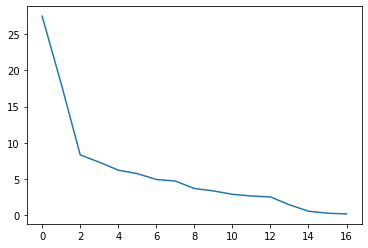

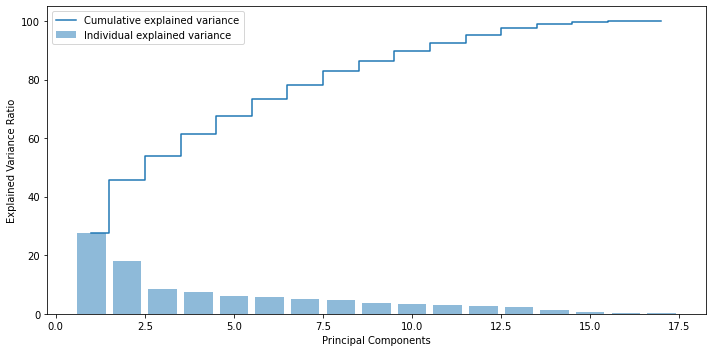

In [141]:
#2.7
plt.plot(var_exp)
plt.show
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [142]:
#2.7
# Based on the cumulative variance explained above guided by the scree and step plot, PCA could be limited to 9 components 
# to cover around 86% of the total variance. Despite the fact that the elbow point in the scree plot happens at the second
# principal component at 46th percent of cumulative variance explained, we are proceeding upto 9 principle components to 
# explain upto 86% of the data.
from sklearn.decomposition import PCA
pca = PCA(n_components = 9)
data_reduced = pca.fit_transform(df_std)
data_reduced.transpose()



array([[ 0.66446306, -0.4135775 , -1.10732571, ...,  0.49793521,
         3.84389251,  1.14432411],
       [ 1.28865905,  1.61896577, -0.32866499, ..., -0.51021251,
        -2.37379354,  0.51174627],
       [ 0.09762038, -0.8921451 ,  0.04967683, ..., -0.01290754,
         6.84700456,  0.70595395],
       ...,
       [-0.98530793, -2.46770502, -0.27503826, ...,  0.56667286,
        -1.28558759,  0.04350688],
       [-0.33002968,  2.39000831,  0.3298787 , ...,  0.87343437,
        -1.44100862,  0.40235599],
       [ 0.06311574, -0.13498267, -0.9566784 , ..., -0.07872606,
         0.13220378,  0.30294122]])

In [144]:
pca.components_

array([[ 4.35748482e-01,  4.39771363e-01,  4.42742378e-01,
         1.53181502e-01,  1.75065087e-01,  4.38826310e-01,
         2.42239117e-01, -2.61764862e-02,  6.02407989e-02,
         2.78879876e-02,  1.39590890e-01, -1.56994590e-02,
         2.36795057e-01,  1.57860597e-01, -6.23355324e-02,
        -6.80083304e-02, -3.18780070e-02],
       [-4.03364844e-02, -3.21520279e-03,  6.72421367e-02,
        -4.27673380e-01, -3.89705820e-01,  1.06366051e-01,
         3.02850148e-01, -3.39135301e-01, -3.37426857e-01,
         5.35469377e-02,  2.35308094e-01,  2.28897263e-02,
        -2.89779165e-01,  1.12474904e-01, -4.06670548e-01,
        -7.75821623e-02, -1.95137290e-02],
       [-2.83934370e-02, -7.03943912e-02, -4.81800486e-02,
         8.35205231e-02,  1.24575309e-02, -5.08358106e-02,
        -1.17403261e-01, -1.45497786e-02, -1.60873407e-02,
        -1.32100671e-01, -1.00622913e-01, -3.76567713e-02,
        -8.53482628e-02,  6.26315466e-01,  1.10257738e-01,
        -7.21243279e-01,  8.3

In [132]:
#2.7
pca.explained_variance_ratio_

array([0.27513939, 0.18168794, 0.08313354, 0.07300976, 0.06195595,
       0.05714323, 0.04903351, 0.04687765, 0.03657863])

In [133]:
#2.7
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var

array([27.5, 45.7, 54. , 61.3, 67.5, 73.2, 78.1, 82.8, 86.5])

In [207]:
#2.7
df_comp = pd.DataFrame(pca.components_,columns=list(df_std))
df_comp

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0  0.435748  0.439771  0.442742   0.153182   0.175065     0.438826   
1 -0.040336 -0.003215  0.067242  -0.427673  -0.389706     0.106366   
2 -0.028393 -0.070394 -0.048180   0.083521   0.012458    -0.050836   
3  0.083867  0.061225  0.019444  -0.026017  -0.112819     0.005072   
4  0.055824  0.070427  0.034239  -0.120617  -0.204426     0.013135   
5  0.012887 -0.003338  0.088223   0.272753   0.236740     0.030091   
6  0.082379  0.085259  0.060206  -0.172554  -0.194417     0.034467   
7  0.066744  0.093046  0.100078   0.029306   0.004554     0.082789   
8 -0.170835 -0.203529 -0.169960   0.143830   0.278259    -0.096521   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0     0.242239 -0.026176    0.060241  0.027888  0.139591 -0.015699  0.236795   
1     0.302850 -0.339135   -0.337427  0.053547  0.235308  0.022890 -0.289779   
2    -0.117403 -0.014550   -0.016087 -0.132101 -0.100623 -0.037657 -0.085348   
3     0.001718  0.251126    0.243087  0.358669 -0.090361  0.718090 -0.207275   
4     0.143841  0.147351    0.163164 -0.699241 -0.073130 -0.123687 -0.000586   
5    -0.275661 -0.364654   -0.537077  0.042283  0.171472  0.086605 -0.092880   
6    -0.040606 -0.216473    0.000572  0.411386 -0.679209 -0.364011  0.156420   
7    -0.041428 -0.301615   -0.147214 -0.414706 -0.540041  0.440089 -0.187159   
8     0.293126 -0.562445    0.365334 -0.034058  0.007837  0.147790  0.298940   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   0.157861    -0.062336 -0.068008  -0.031878  
1   0.112475    -0.406671 -0.077582  -0.019514  
2   0.626315     0.110258 -0.721243   0.083966  
3   0.059064    -0.095293 -0.011642   0.380947  
4  -0.082250    -0.031783  0.076787   0.584773  
5  -0.154912     0.157064  0.016135   0.516754  
6   0.030832     0.042291  0.053962   0.268074  
7  -0.028138     0.121103  0.096712  -0.370993  
8   0.209099    -0.249165  0.143119   0.136457

In [206]:
#2.6
# print(df_edu.info())
print('Explicit form of the first PC (in terms of Eigen Vectors): ')
print('----------------------------------------------------------')

for i in range(0,pca.components_.shape[1]):
    if i==pca.components_.shape[1]-1:
        print('{} * {}'.format(np.round(pca.components_[0][i],6),df_edu.columns[i+1]),end=" ")
    else:
        print('{} * {}'.format(np.round(pca.components_[0][i],6),df_edu.columns[i+1]),end=' + ')





Explicit form of the first PC (in terms of Eigen Vectors): 
----------------------------------------------------------
0.435748 * Apps + 0.439771 * Accept + 0.442742 * Enroll + 0.153182 * Top10perc + 0.175065 * Top25perc + 0.438826 * F.Undergrad + 0.242239 * P.Undergrad + -0.026176 * Outstate + 0.060241 * Room.Board + 0.027888 * Books + 0.139591 * Personal + -0.015699 * PhD + 0.236795 * Terminal + 0.157861 * S.F.Ratio + -0.062336 * perc.alumni + -0.068008 * Expend + -0.031878 * Grad.Rate 